# Proposed project title :	Demand Forecasting & Inventory Optimization

In [1]:
## 1. Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# import train-test split 
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import various functions from scipy
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

## 2. Importing the Dataset

In [4]:
df=pd.read_csv('Kaggle_Training_Dataset_v2.csv')
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## 3. Pre-Processing Data Analysis

In [5]:
#Shape of the dataset 
print('Shape of the data-set:', df.shape)

Shape of the data-set: (1687861, 23)


In [6]:
#Data set infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [7]:
#Data types of the features
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [8]:
#Number of duplicated rows:
sum(df.duplicated())

0

### 3.1 Missing value

In [9]:
#Handling missing data - checking the count of missing values:
df.isnull().sum()[df.isnull().sum()>0]

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [10]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [11]:
#Dropping sku column
df.drop(["sku"], axis=1,inplace=True)

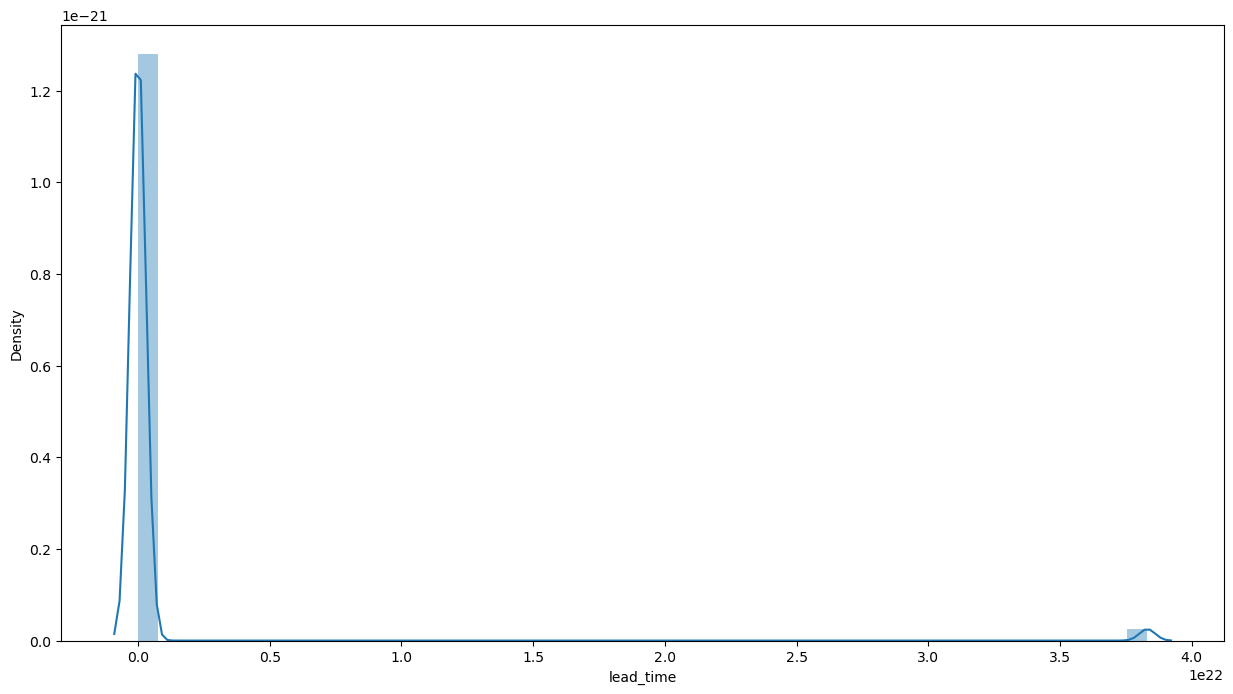

In [12]:
#Looking into the distribution of lead time
box_leadtime=np.exp(df['lead_time'])
sns.distplot(box_leadtime)
plt.show()

In [13]:
#From the distribution we can infer that the feature is right skewed 

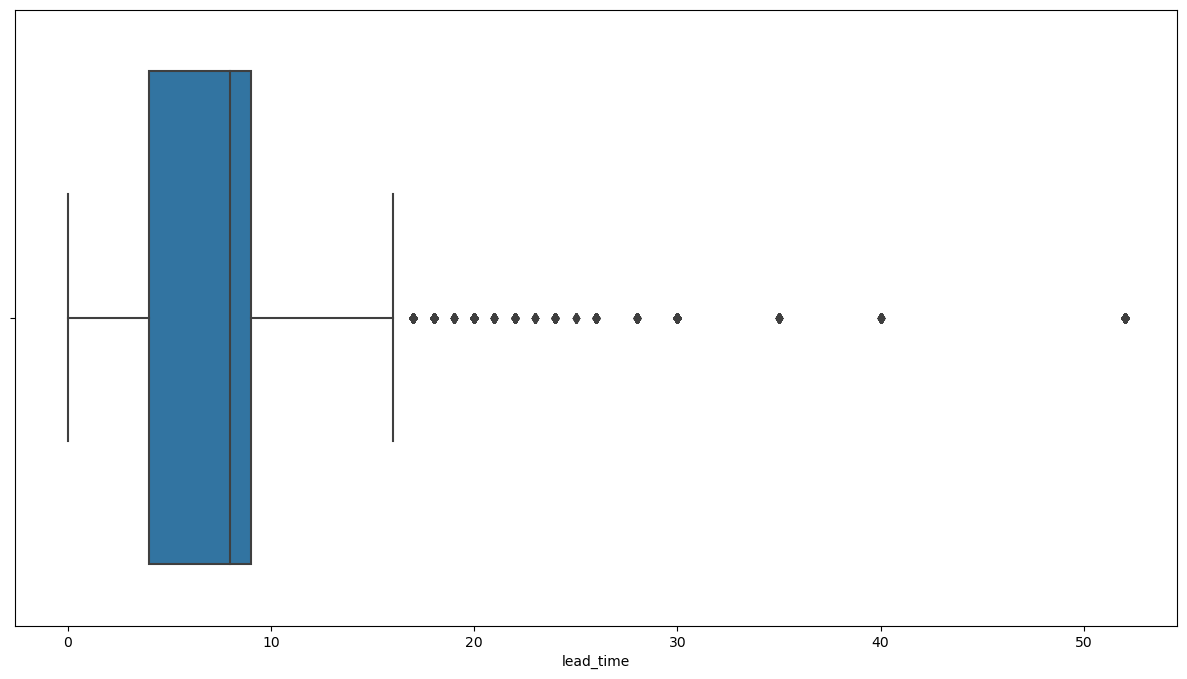

In [14]:
#Checking if lead time attribute has any outliers - (To check if the missing values must be replaced by mean or median)
sns.boxplot(df.lead_time) 
plt.show()

In [15]:
#From the above plot we can see that the variable has outliers

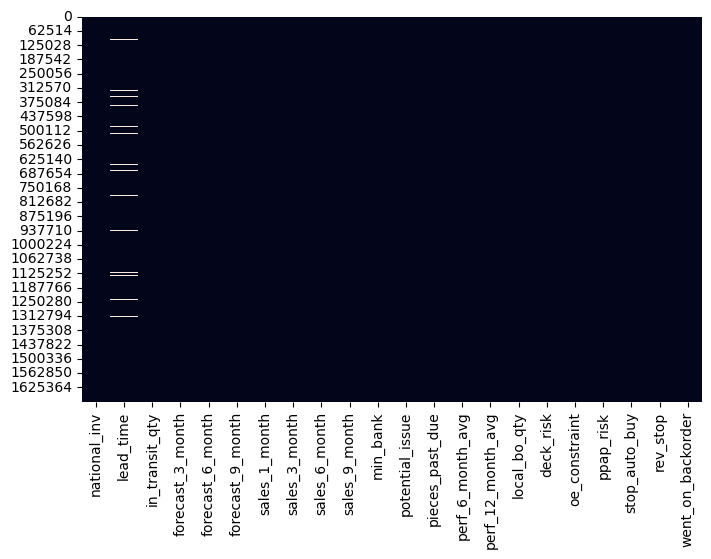

In [16]:
#Missing value plot

figure=plt.figure(figsize=(8,5))

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [17]:
#A majority of data is missing in the lead time (100894 values are missing). 
#The feature also has some outliers
#Dropping the missing values would not be a good option as it would lead to loss of significant data
#Therefore, the missing values in the lead time feature is replaced with the median value

In [18]:
#Calculating the median for 'Lead_time' attributes
med_lt=df['lead_time'].astype('float').median()

#Replace Nan by median value

df['lead_time']=df['lead_time'].astype('float')
df['lead_time'].replace(np.nan, med_lt, inplace=True)

In [19]:
#perf_6_month_avg, perf_12_month_avg attributes have missing data with -99 values
#Replacing -99 with median values of each

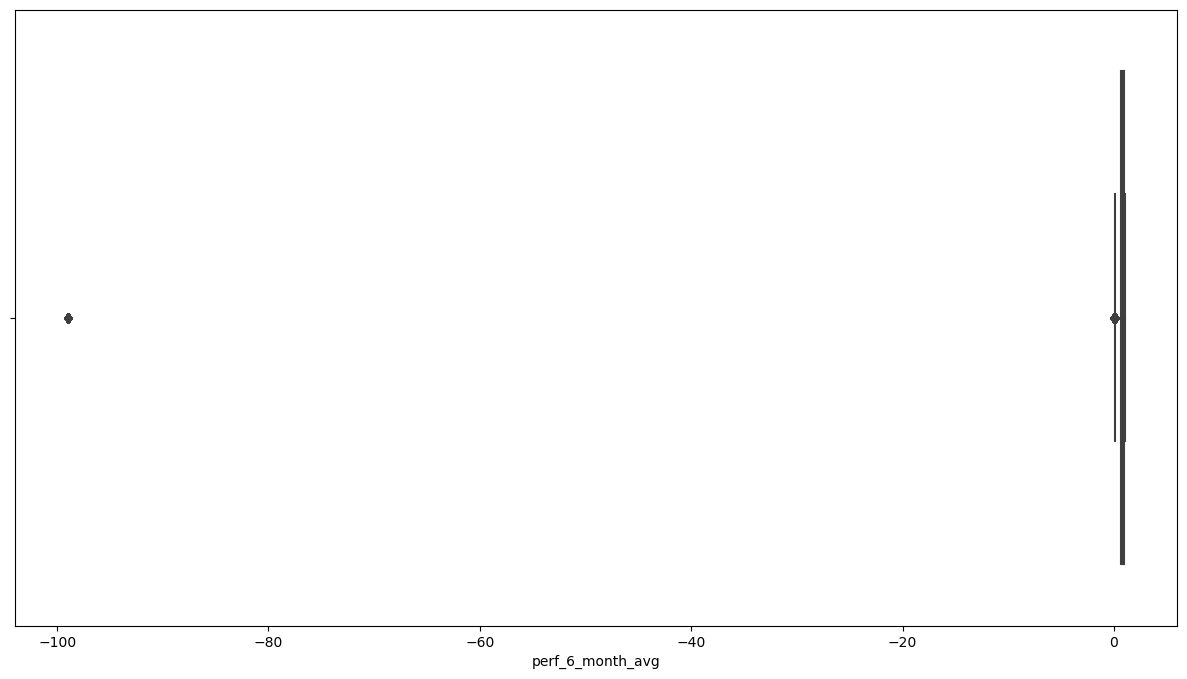

In [20]:
sns.boxplot(df.perf_6_month_avg) 
plt.show()

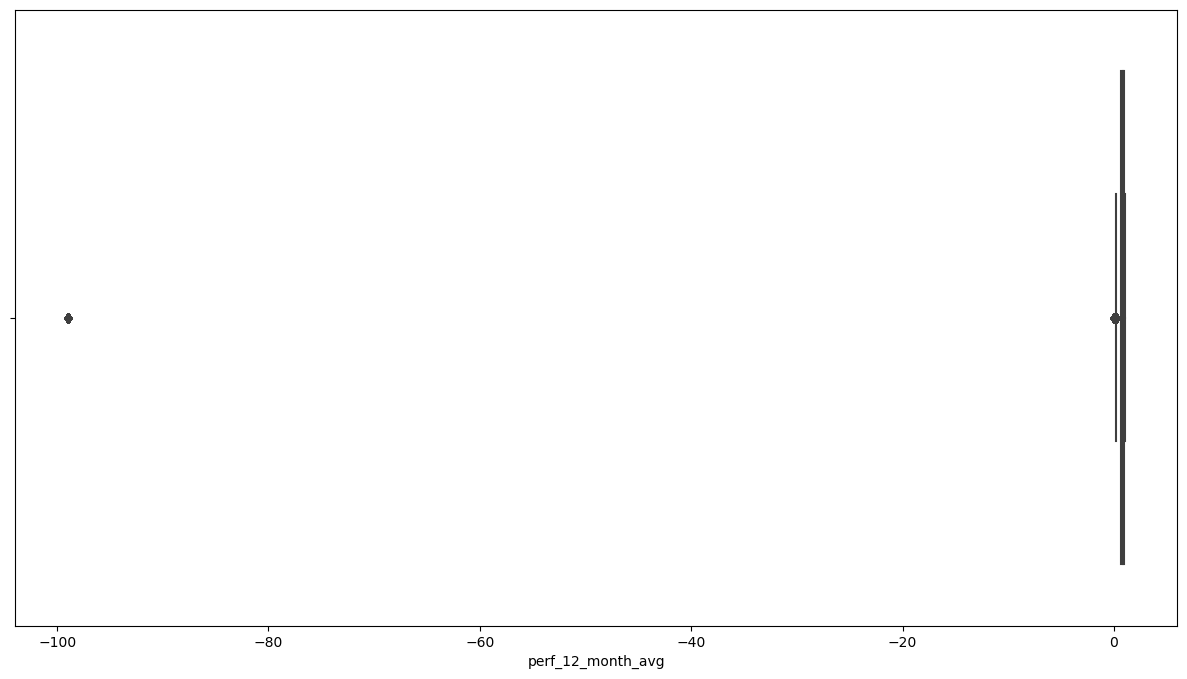

In [21]:
sns.boxplot(df.perf_12_month_avg) 
plt.show()

In [22]:
#We see that the data has outliers, hence, replacing the negative values with 0

In [23]:
#Replace neg value with 0 perf_6_month_avg

#df['perf_6_month_avg']=df['perf_6_month_avg'].astype('float')
df['perf_6_month_avg'].replace(-99, 0, inplace=True)

In [24]:
#Replace neg value with 0 for 'perf_12_month_avg

#df['perf_12_month_avg']=df['perf_12_month_avg'].astype('float')
df['perf_12_month_avg'].replace(-99, 0, inplace=True)

In [25]:
#checking the count of missing values:
df.isnull().sum()[df.isnull().sum()>0]

national_inv         1
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [26]:
#The null values in the lead time attribute is replaced by the median values and the negative values in perf_6_month_avg and perf_12_month_avg  
#are replaced with 0 values
##From the above description we observe that there is 1 missing value in each attribute
#The null values in each attributes are dropped

In [27]:
#Dropping the nan values in columns

df=df.dropna()

In [28]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.00,0.00,0.0,Yes,No,No,Yes,No,No


In [29]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [30]:
df.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [31]:
df.shape

(1687860, 22)

In [32]:
df = df[~((df["forecast_3_month"] == 0) & (df["forecast_6_month"] == 0)& (df["forecast_9_month"] == 0)& (df["sales_1_month"] == 0)& (df["sales_3_month"] == 0)& (df["sales_6_month"] == 0)& (df["sales_9_month"] == 0)& (df["went_on_backorder"] == "No"))]

In [33]:
df.shape

(1189312, 22)

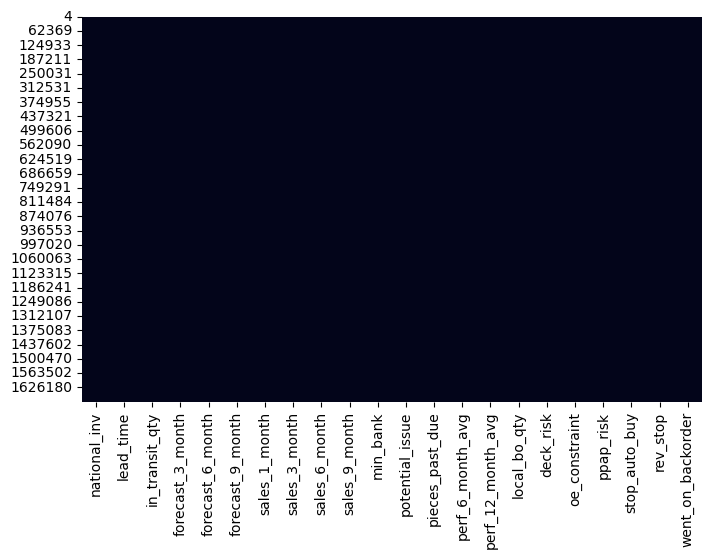

In [34]:
#Missing value plot

figure=plt.figure(figsize=(8,5))

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [35]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06,1.189312e+06
mean,6.342010e+02,7.607228e+00,6.227828e+01,2.527852e+02,4.896017e+02,7.186275e+02,7.936973e+01,2.483951e+02,4.849782e+02,7.454576e+02,7.464807e+01,2.900171e+00,7.449938e-01,7.418917e-01,8.890358e-01
std,3.496281e+04,6.895748e+00,1.599150e+03,5.986546e+03,1.166591e+04,1.712513e+04,2.296651e+03,6.184195e+03,1.144911e+04,1.767257e+04,1.494486e+03,2.811615e+02,3.022217e-01,2.924422e-01,4.017033e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e-01,6.700000e-01,0.000000e+00
50%,2.600000e+01,8.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,5.000000e+00,1.100000e+01,1.600000e+01,1.000000e+00,0.000000e+00,8.500000e-01,8.400000e-01,0.000000e+00
75%,1.250000e+02,8.000000e+00,1.000000e+00,1.900000e+01,4.400000e+01,7.000000e+01,1.100000e+01,3.600000e+01,7.400000e+01,1.130000e+02,1.600000e+01,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


##  4. Data Exploration (EDA)

## OUTLIER

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'national_inv'),
  Text(2, 0, 'lead_time'),
  Text(3, 0, 'in_transit_qty'),
  Text(4, 0, 'forecast_3_month'),
  Text(5, 0, 'forecast_6_month'),
  Text(6, 0, 'forecast_9_month'),
  Text(7, 0, 'sales_1_month'),
  Text(8, 0, 'sales_3_month'),
  Text(9, 0, 'sales_6_month'),
  Text(10, 0, 'sales_9_month'),
  Text(11, 0, 'min_bank'),
  Text(12, 0, 'pieces_past_due'),
  Text(13, 0, 'perf_6_month_avg'),
  Text(14, 0, 'perf_12_month_avg'),
  Text(15, 0, 'local_bo_qty')])

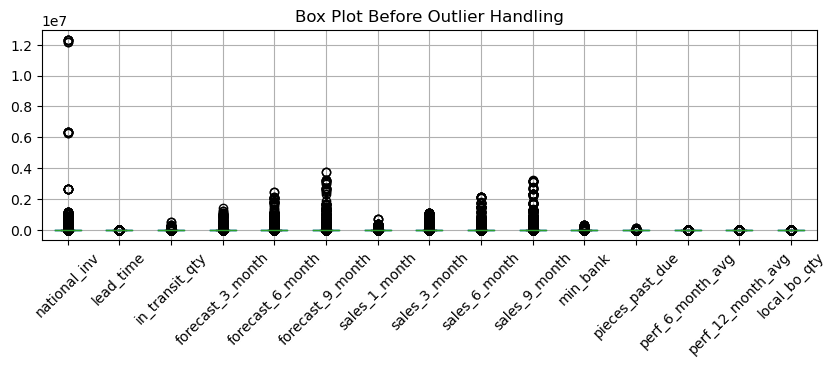

In [36]:
# Plot box plots before and after outlier handling
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df.boxplot()
plt.title("Box Plot Before Outlier Handling")
plt.xticks(rotation=45)

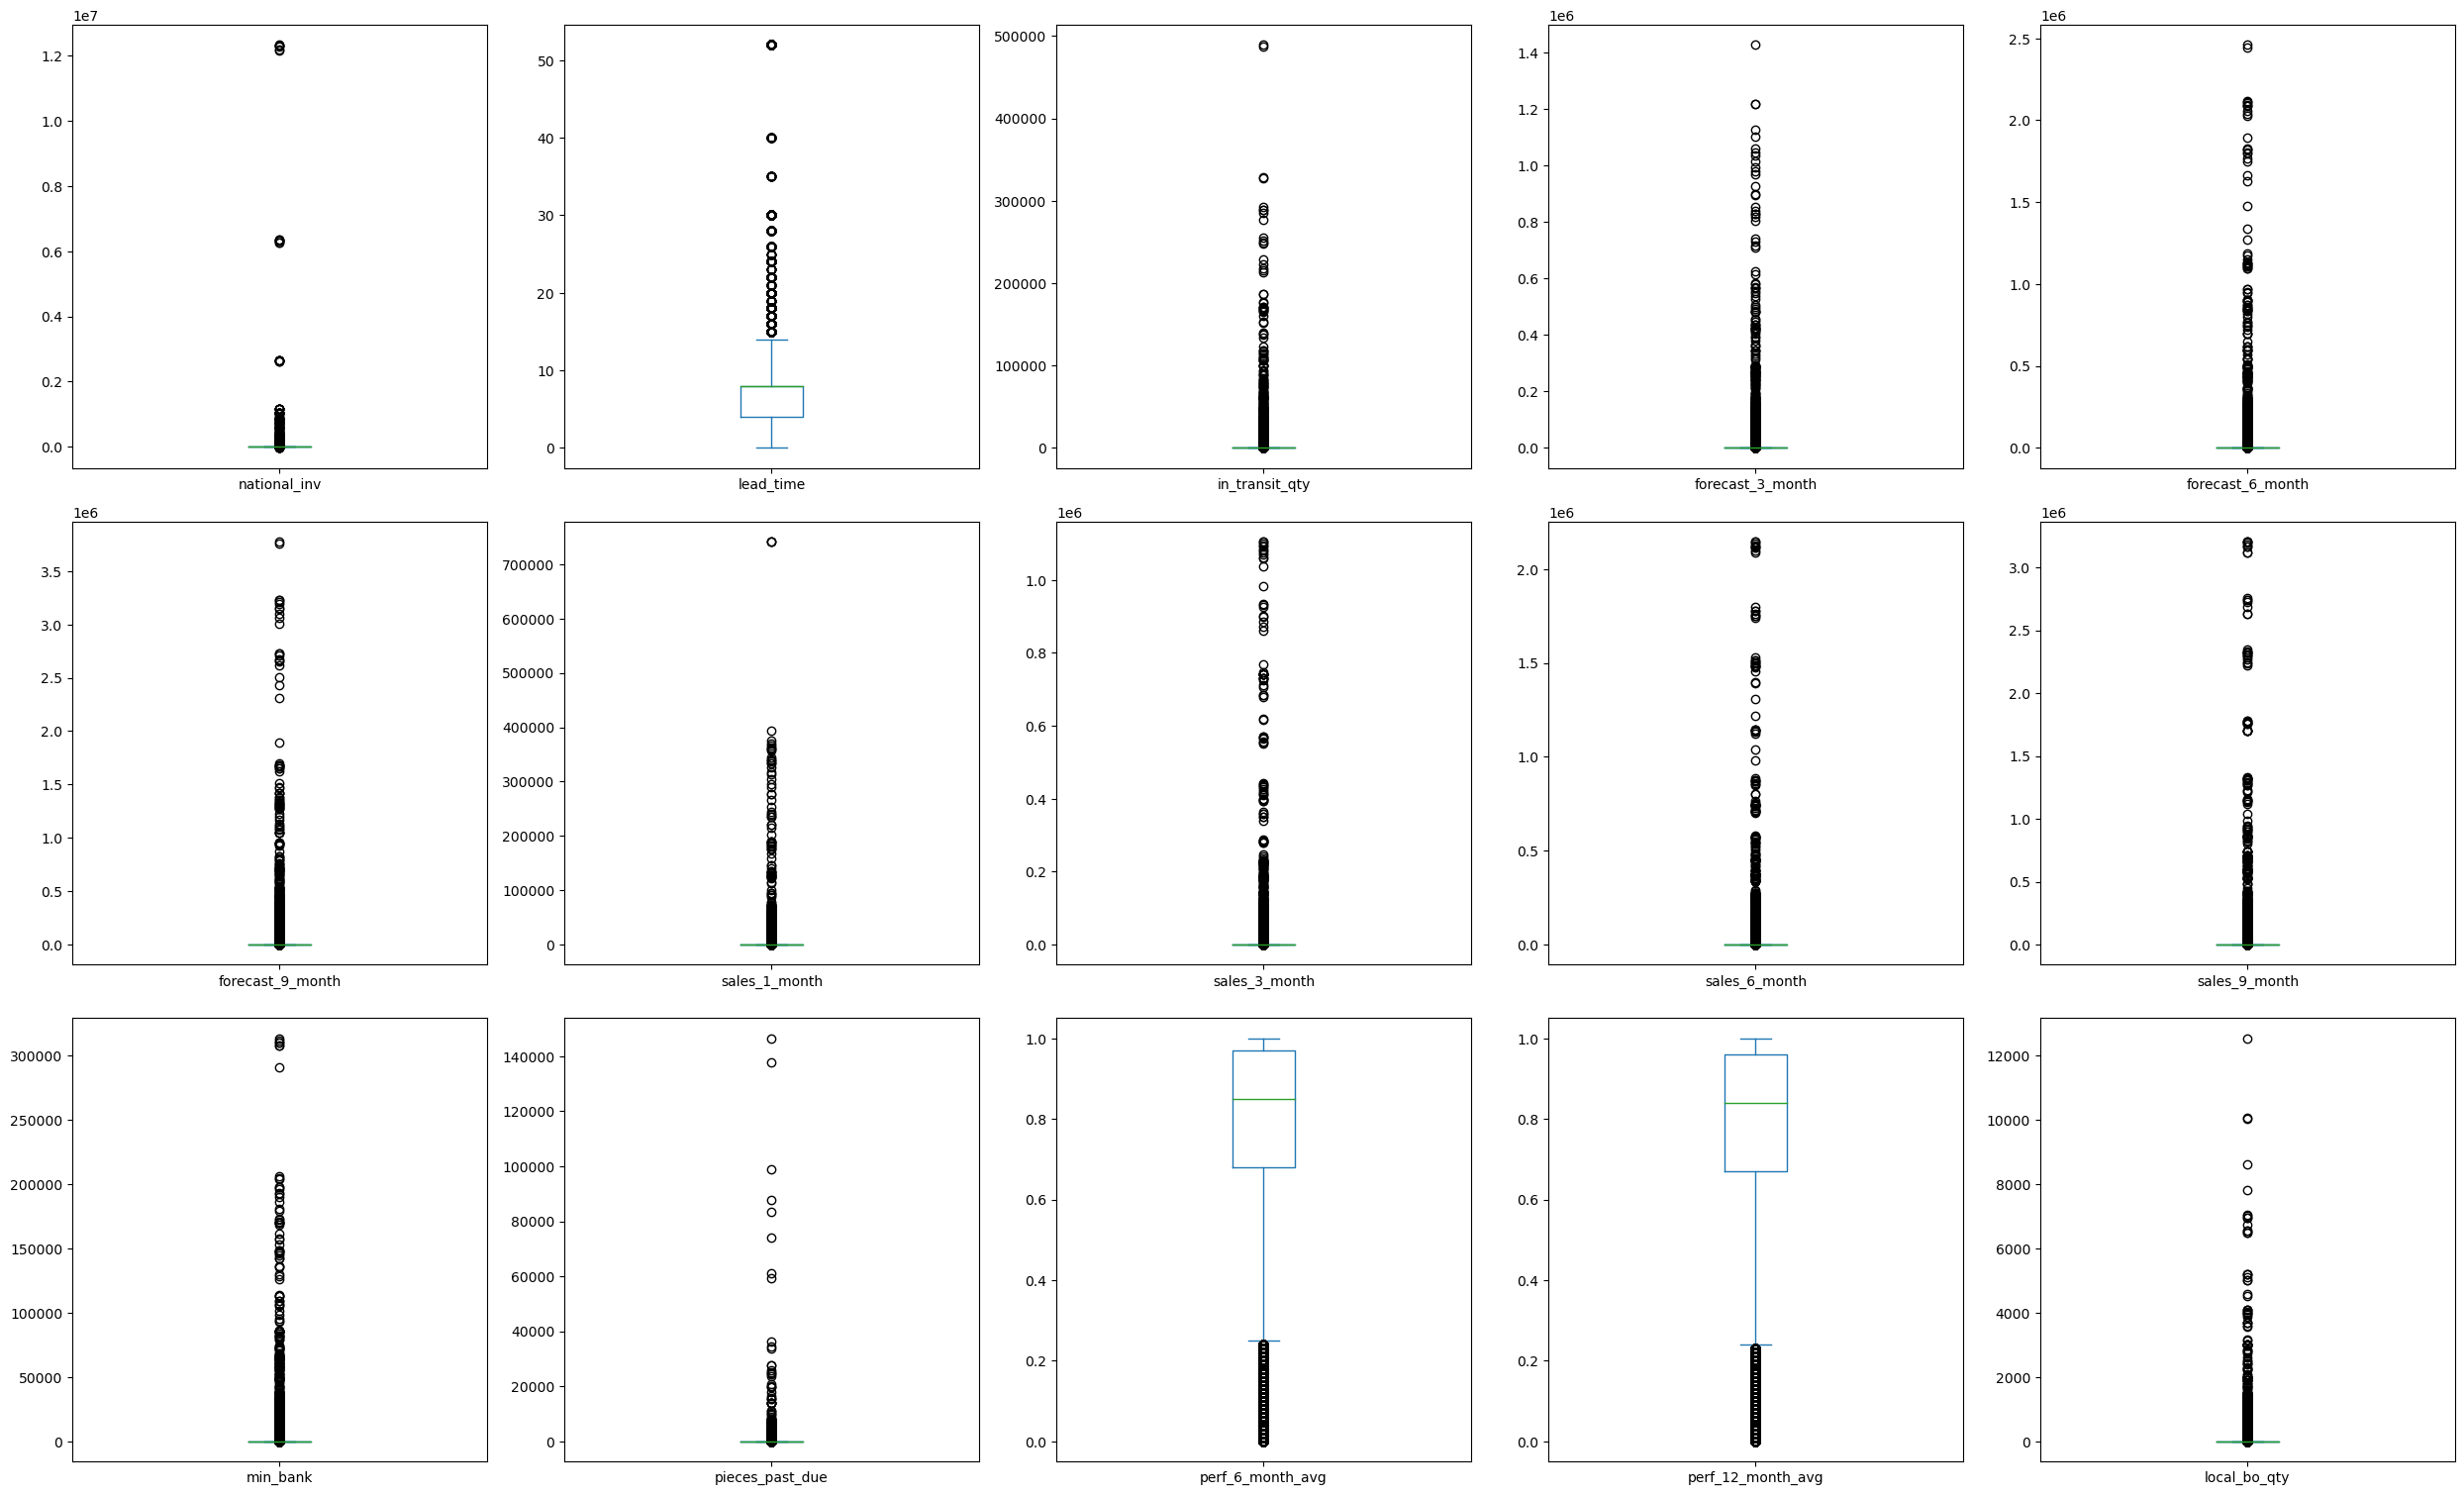

In [37]:
#Before outlier treatment
plt.rcParams['figure.figsize']=[25,25]
df.plot(kind='box', subplots=True, layout=(5,5))
plt.tight_layout()
plt.show()

In [38]:
import numpy as np

# Define the factor for calculating the floor and ceiling values
outlier_factor = 1.5

# Define categorical features
categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']

# Copy the original DataFrame to avoid modifying the original data
df_final_processed = df.copy()

# Calculate the Q1, Q3, and IQR for numerical features
numerical_features = df_final_processed.columns.difference(categorical_features)
floor_values = {}  # Store floor values for each numerical feature
ceiling_values = {}  # Store ceiling values for each numerical feature

for column in numerical_features:
    q1 = df_final_processed[column].quantile(0.25)
    q3 = df_final_processed[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the floor and ceiling values
    floor_values[column] = q1 - outlier_factor * iqr
    ceiling_values[column] = q3 + outlier_factor * iqr
    
    # Apply outlier treatment for values below the floor value
    df_final_processed[column] = np.where(df_final_processed[column] < floor_values[column], floor_values[column], df_final_processed[column])
    # Apply outlier treatment for values above the ceiling value
    df_final_processed[column] = np.where(df_final_processed[column] > ceiling_values[column], ceiling_values[column], df_final_processed[column])

# Assign the processed DataFrame back to the original variable name "df"
df = df_final_processed

# Display a few rows of the updated DataFrame
print(df.head())
print(floor_values)
print(ceiling_values)


    national_inv  lead_time  in_transit_qty  forecast_3_month  \
4            8.0        8.0             0.0               0.0   
8          140.0        8.0             0.0              15.0   
27           4.0        2.0             0.0               0.0   
28           0.0        8.0             0.0               0.0   
31          20.0        8.0             0.0               0.0   

    forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
4                0.0               0.0            0.0            0.0   
8              110.0             152.0            0.0            0.0   
27               0.0               0.0            0.0            0.0   
28               0.0               0.0            1.0            1.0   
31               0.0               0.0            0.0            0.0   

    sales_6_month  sales_9_month  ...  pieces_past_due perf_6_month_avg  \
4             0.0            4.0  ...              0.0            0.245   
8             0.0         

In [39]:
df.std()

national_inv         108.379102
lead_time              3.411997
in_transit_qty         1.064454
forecast_3_month      18.623318
forecast_6_month      42.671361
forecast_9_month      67.557258
sales_1_month         10.256517
sales_3_month         33.013791
sales_6_month         67.744721
sales_9_month        103.457791
min_bank              15.118460
pieces_past_due        0.000000
perf_6_month_avg       0.246116
perf_12_month_avg      0.241350
local_bo_qty           0.000000
dtype: float64

In [40]:
# Calculate the standard deviation of each feature
std_dev = df.std()

# Identify features with zero standard deviation
zero_std_features = std_dev[std_dev == 0].index

# Drop features with zero standard deviation
df = df.drop(zero_std_features, axis=1)

# Print the dropped features
print("Dropped features with zero standard deviation:", zero_std_features)

# Display the modified DataFrame
print(df.head())


Dropped features with zero standard deviation: Index(['pieces_past_due', 'local_bo_qty'], dtype='object')
    national_inv  lead_time  in_transit_qty  forecast_3_month  \
4            8.0        8.0             0.0               0.0   
8          140.0        8.0             0.0              15.0   
27           4.0        2.0             0.0               0.0   
28           0.0        8.0             0.0               0.0   
31          20.0        8.0             0.0               0.0   

    forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
4                0.0               0.0            0.0            0.0   
8              110.0             152.0            0.0            0.0   
27               0.0               0.0            0.0            0.0   
28               0.0               0.0            1.0            1.0   
31               0.0               0.0            0.0            0.0   

    sales_6_month  sales_9_month  min_bank potential_issue  perf_6_mon

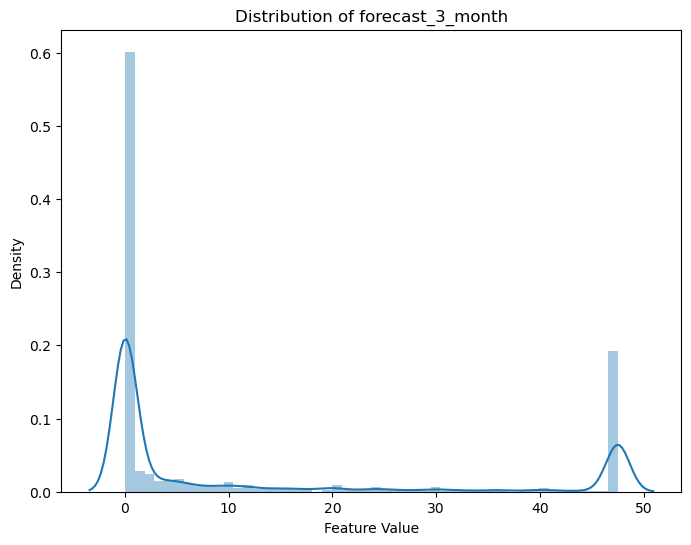

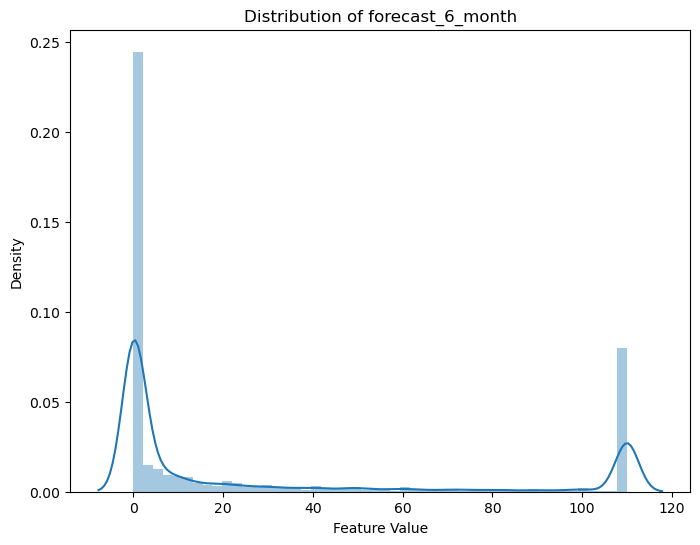

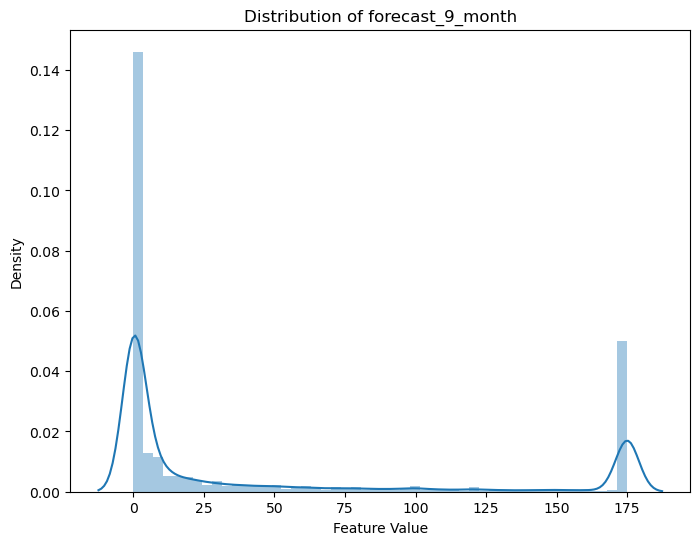

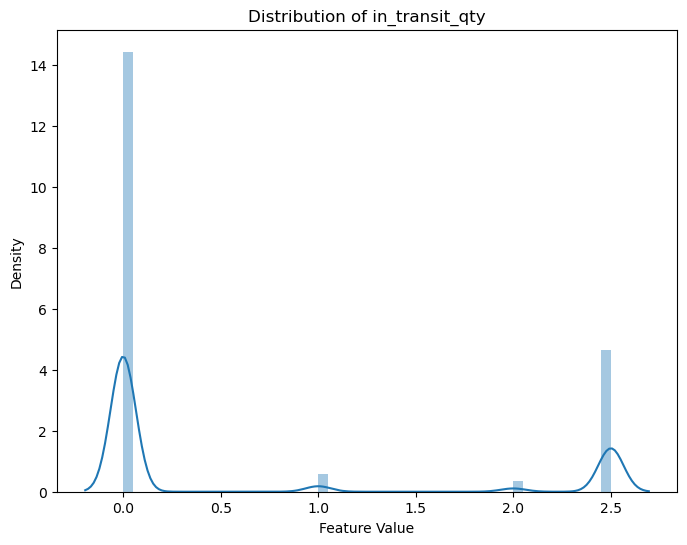

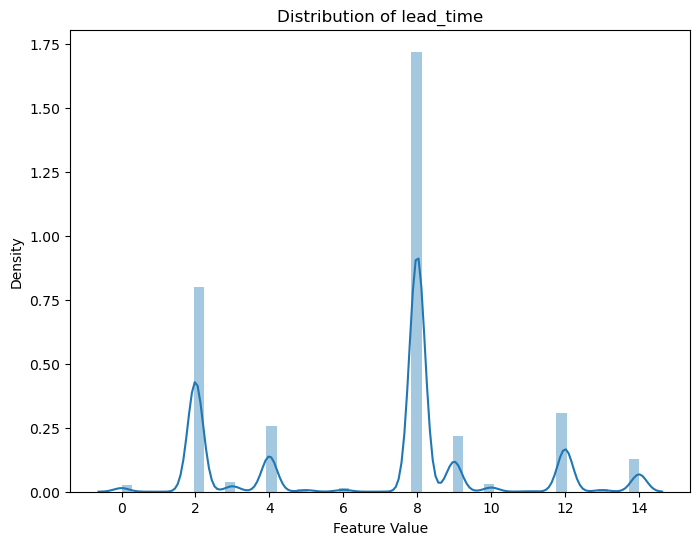

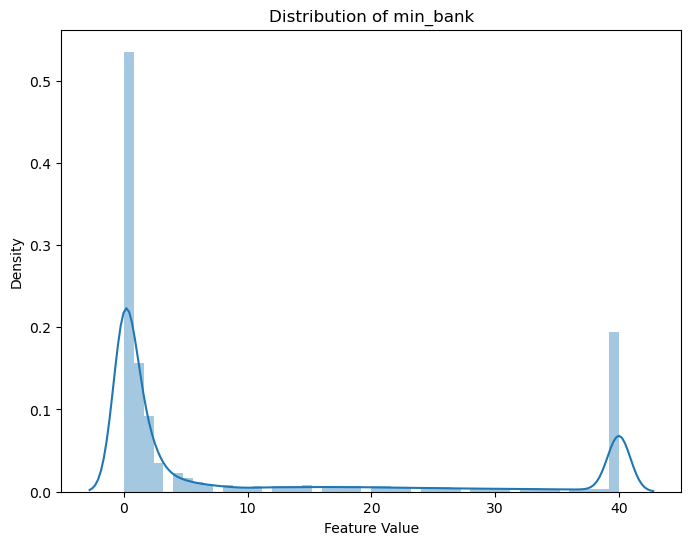

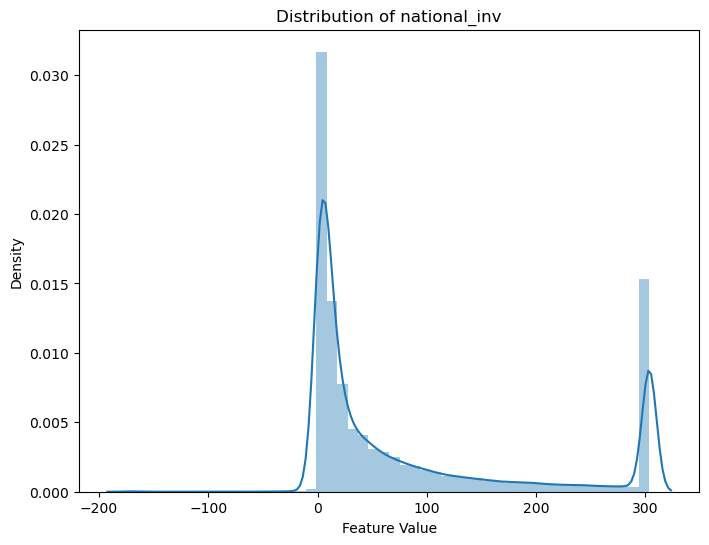

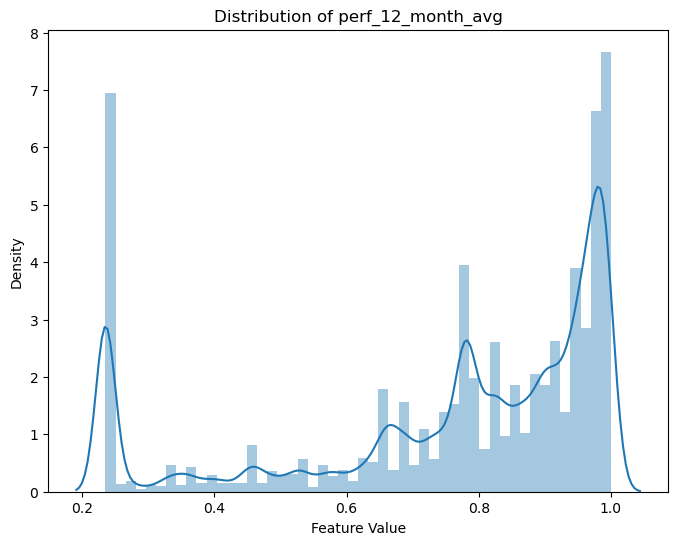

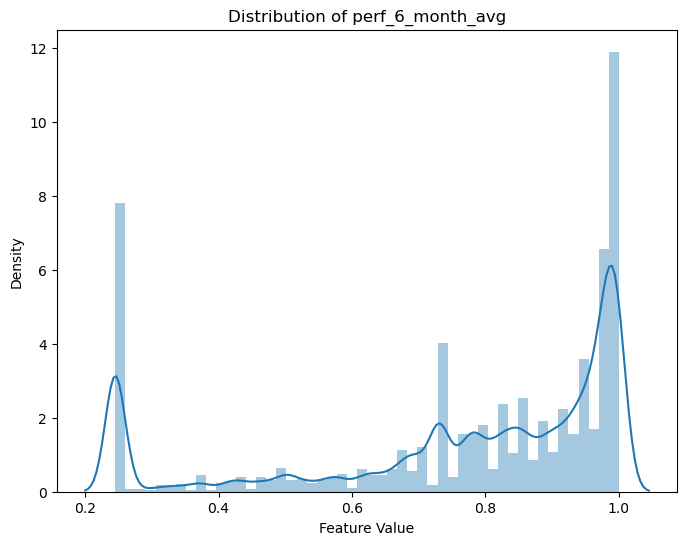

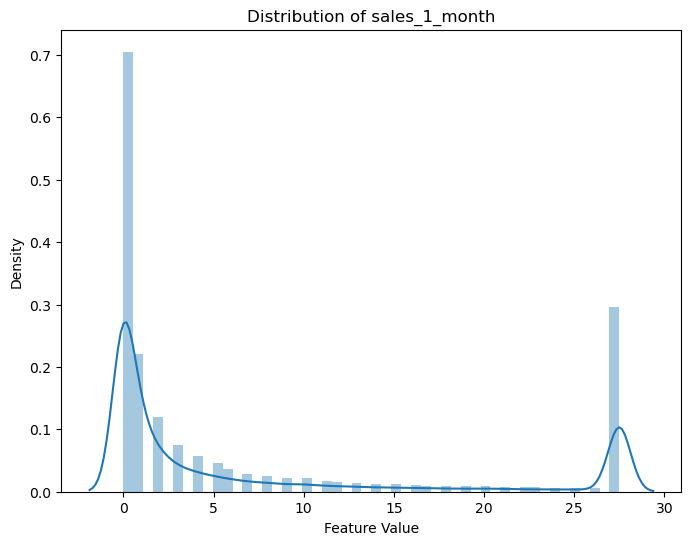

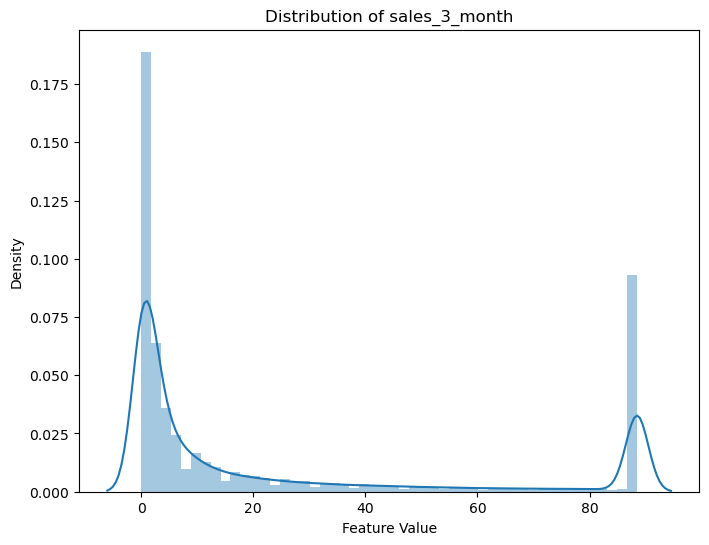

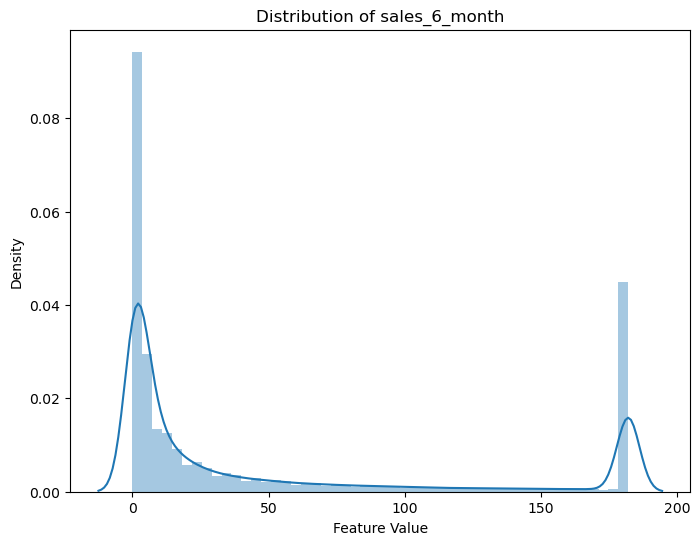

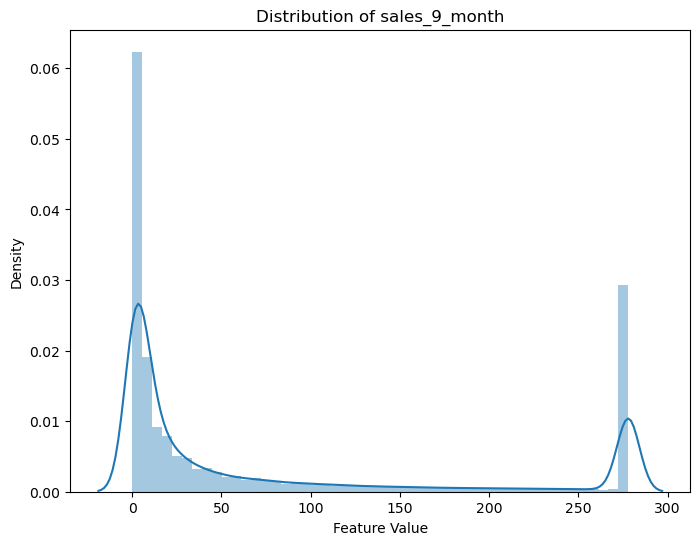

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df.columns.difference(categorical_features)

# Loop through each numerical feature and plot its distribution
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.show()


In [42]:
from sklearn.preprocessing import LabelEncoder

col_encode=['potential_issue', 'deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']

le=LabelEncoder()

for i in col_encode:
    encoded=le.fit_transform(df[i])
    df[i]=encoded
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.245,0.235,1,0,0,1,0,0
8,140.0,8.0,0.0,15.0,110.0,152.0,0.0,0.0,0.0,0.0,0.0,0,0.245,0.235,0,0,0,1,0,0
27,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.245,0.235,0,0,0,1,0,0
28,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0,0.245,0.235,1,0,0,1,0,0
31,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.245,0.235,0,0,0,1,0,0


In [43]:
y = pd.DataFrame(df['went_on_backorder'])
X = pd.DataFrame(df.drop('went_on_backorder', axis=1))

In [44]:
y.value_counts()

went_on_backorder
0                    1178019
1                      11293
dtype: int64

In [45]:
#From the above output we can infer that there is an imbalance in the data. Hence we need to perform class imbalance

In [46]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Set the desired class distribution ratio
desired_ratio = 1

# Initialize SMOTE with the desired sampling_strategy
smote = SMOTE(sampling_strategy=desired_ratio)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame for the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=y.columns)], axis=1)

# Print class distribution before and after SMOTE
print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", y_resampled['went_on_backorder'].value_counts())


Original class distribution: went_on_backorder
0                    1178019
1                      11293
dtype: int64
Resampled class distribution: 0    1178019
1    1178019
Name: went_on_backorder, dtype: int64


In [48]:
df_resampled.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.245,0.235,1,0,0,1,0,0
1,140.0,8.0,0.0,15.0,110.0,152.0,0.0,0.0,0.0,0.0,0.0,0,0.245,0.235,0,0,0,1,0,0
2,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.245,0.235,0,0,0,1,0,0
3,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0,0.245,0.235,1,0,0,1,0,0
4,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.245,0.235,0,0,0,1,0,0


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate features into numerical and categorical
numerical_features = df_resampled.columns.difference(categorical_features)

# Initialize DataFrame to store results
vif_results = pd.DataFrame(columns=["Dropped_Feature", "VIF_Dropped_Feature"])

# Calculate VIF for numerical features
X_numerical = df_resampled[numerical_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

# Loop to iteratively drop features based on high VIF
while vif_data["VIF"].max() >= 10:
    max_vif_index = vif_data["VIF"].idxmax()
    dropped_feature = vif_data.loc[max_vif_index, "feature"]
    vif_results = vif_results.append({"Dropped_Feature": dropped_feature, "VIF_Dropped_Feature": vif_data.loc[max_vif_index, "VIF"]}, ignore_index=True)
    X_numerical = X_numerical.drop(columns=dropped_feature)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_numerical.columns
    vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

# Display the results of dropped features and their VIF values
print("Features Dropped and Their VIF Values:")
print(vif_results)


Features Dropped and Their VIF Values:
     Dropped_Feature  VIF_Dropped_Feature
0      sales_6_month           210.013716
1  perf_12_month_avg           114.743695
2   forecast_6_month            60.272933
3      sales_3_month            54.086340
4      sales_9_month            16.648181
5   forecast_9_month            12.188330


In [50]:
df_resampled.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.245,0.235,1,0,0,1,0,0
1,140.0,8.0,0.0,15.0,110.0,152.0,0.0,0.0,0.0,0.0,0.0,0,0.245,0.235,0,0,0,1,0,0
2,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.245,0.235,0,0,0,1,0,0
3,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0,0.245,0.235,1,0,0,1,0,0
4,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.245,0.235,0,0,0,1,0,0


In [51]:
# List of column levels to drop
columns_to_drop = ['sales_6_month', 'perf_12_month_avg','forecast_6_month', 'sales_3_month', 'sales_9_month', 'forecast_9_month']

# Drop the specified columns
df_resampled = df_resampled.drop(columns=columns_to_drop, axis=1)

# Display a few rows of the updated DataFrame
print(df_resampled.head())



   national_inv  lead_time  in_transit_qty  forecast_3_month  sales_1_month  \
0           8.0        8.0             0.0               0.0            0.0   
1         140.0        8.0             0.0              15.0            0.0   
2           4.0        2.0             0.0               0.0            0.0   
3           0.0        8.0             0.0               0.0            1.0   
4          20.0        8.0             0.0               0.0            0.0   

   min_bank  potential_issue  perf_6_month_avg  deck_risk  oe_constraint  \
0       2.0                0             0.245          1              0   
1       0.0                0             0.245          0              0   
2       0.0                0             0.245          0              0   
3       0.0                0             0.245          1              0   
4       0.0                0             0.245          0              0   

   ppap_risk  stop_auto_buy  rev_stop  went_on_backorder  
0        

In [52]:
df_resampled.shape

(2356038, 14)

In [53]:
df_resampled.std()

national_inv         89.660196
lead_time             3.395462
in_transit_qty        0.908605
forecast_3_month     18.849363
sales_1_month         9.625266
min_bank             14.014899
potential_issue       0.023555
perf_6_month_avg      0.244633
deck_risk             0.369165
oe_constraint         0.015876
ppap_risk             0.301579
stop_auto_buy         0.212192
rev_stop              0.012429
went_on_backorder     0.500000
dtype: float64

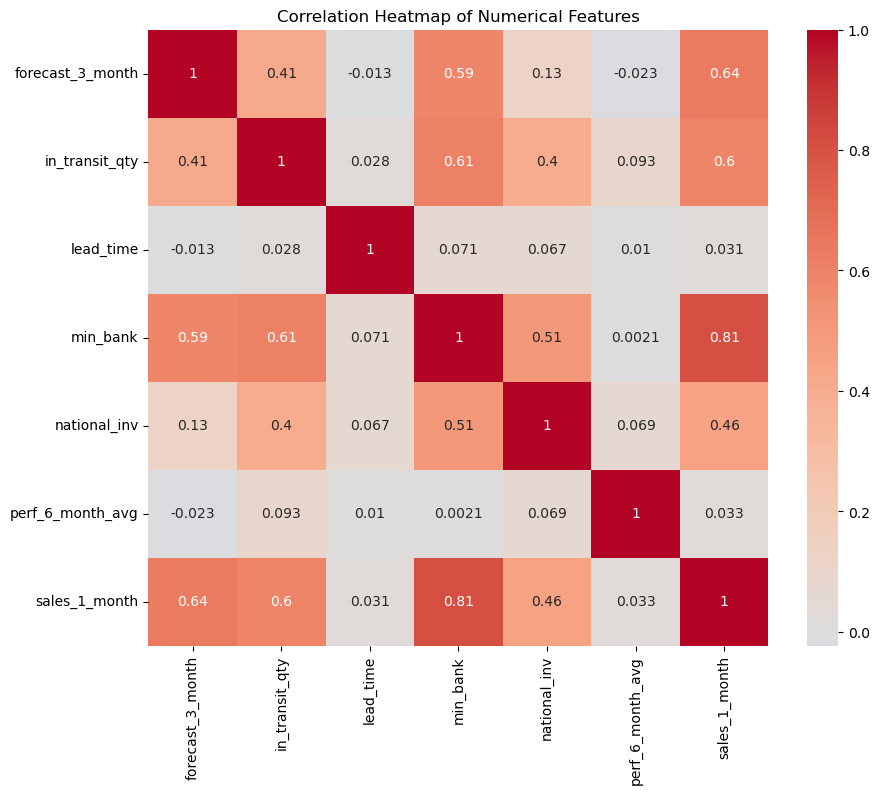

In [54]:
# Separate features into numerical and categorical
numerical_features = df_resampled.columns.difference(categorical_features)

# Calculate the correlation matrix
correlation_matrix = df_resampled[numerical_features].corr()

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [55]:
#drop features with corr>0.75
#we can drop either sales_1_month or min_bank


In [56]:
df_resampled.drop('sales_1_month', axis=1, inplace=True)


In [57]:
from scipy.stats import chi2_contingency

# Separate features into numerical and categorical
numerical_features = df_resampled.columns.difference(categorical_features)

# Initialize DataFrame to store correlation ratios
correlation_ratio_results = pd.DataFrame(columns=["Categorical_Feature", "Correlation_Ratio"])

# Assess multicollinearity for categorical features using correlation ratios
for cat_feature in categorical_features:
    if cat_feature != 'went_on_backorder':
        cross_tab = pd.crosstab(df_resampled[cat_feature], df_resampled['went_on_backorder'])
        chi2, _, _, _ = chi2_contingency(cross_tab)
        correlation_ratio = np.sqrt(chi2 / (df_resampled.shape[0] * min(cross_tab.shape) - 1))
        correlation_ratio_results = correlation_ratio_results.append({"Categorical_Feature": cat_feature, "Correlation_Ratio": correlation_ratio}, ignore_index=True)

# Set a threshold for high correlation ratio
correlation_ratio_threshold = 0.5

# Identify categorical features with high correlation ratios
high_corr_categorical_features = correlation_ratio_results[correlation_ratio_results["Correlation_Ratio"] >= correlation_ratio_threshold]["Categorical_Feature"]

# Drop categorical features with high correlation ratios
df_resampled = df_resampled.drop(columns=high_corr_categorical_features)

In [58]:
correlation_ratio_results

,Categorical_Feature,Correlation_Ratio
0,potential_issue,0.005135
1,deck_risk,0.084046
2,oe_constraint,0.002439
3,ppap_risk,0.040752
4,stop_auto_buy,0.028106
5,rev_stop,0.008766


In [59]:
high_corr_categorical_features

Series([], Name: Categorical_Feature, dtype: object)

In [60]:
#no categorical feature id dropped

In [61]:
df_resampled

,national_inv,lead_time,in_transit_qty,forecast_3_month,min_bank,potential_issue,perf_6_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8.000000,8.000000,0.000000,0.000000,2.000000,0,0.245000,1,0,0,1,0,0
1,140.000000,8.000000,0.000000,15.000000,0.000000,0,0.245000,0,0,0,1,0,0
2,4.000000,2.000000,0.000000,0.000000,0.000000,0,0.245000,0,0,0,1,0,0
3,0.000000,8.000000,0.000000,0.000000,0.000000,0,0.245000,1,0,0,1,0,0
4,20.000000,8.000000,0.000000,0.000000,0.000000,0,0.245000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356033,8.000000,8.000000,0.324852,47.500000,40.000000,0,0.588787,0,0,1,1,0,1
2356034,0.000000,8.452517,0.000000,16.810069,1.642449,0,0.931173,0,0,0,1,0,1
2356035,-5.105334,8.000000,0.000000,0.000000,0.000000,0,0.245000,1,0,0,1,0,1
2356036,1.121392,9.364176,0.000000,19.121392,0.878608,0,0.703064,0,0,0,1,0,1


In [62]:
from sklearn.preprocessing import StandardScaler

# Separate categorical and numerical features
categorical_features = ['potential_issue', 'deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']
numerical_features = df_resampled.columns.difference(categorical_features)

# Extract features and target
X_resampled = df_resampled[numerical_features]
y_resampled = df_resampled['went_on_backorder']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features using the StandardScaler
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Create a DataFrame for the scaled numerical features
df_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=numerical_features)

# Merge scaled numerical features back with categorical features and target
df_resampled_scaled = pd.concat([df_resampled_scaled, df_resampled[categorical_features]], axis=1)

# Display a few rows of the scaled DataFrame
print(df_resampled_scaled.head())

   forecast_3_month  in_transit_qty  lead_time  min_bank  national_inv  \
0         -0.820539       -0.497127   0.413784 -0.441999     -0.425740   
1         -0.024755       -0.497127   0.413784 -0.584704      1.046486   
2         -0.820539       -0.497127  -1.353281 -0.584704     -0.470353   
3         -0.820539       -0.497127   0.413784 -0.584704     -0.514966   
4         -0.820539       -0.497127   0.413784 -0.584704     -0.291901   

   perf_6_month_avg  potential_issue  deck_risk  oe_constraint  ppap_risk  \
0           -2.0162                0          1              0          0   
1           -2.0162                0          0              0          0   
2           -2.0162                0          0              0          0   
3           -2.0162                0          1              0          0   
4           -2.0162                0          0              0          0   

   stop_auto_buy  rev_stop  went_on_backorder  
0              1         0                  

In [63]:
from sklearn.decomposition import PCA

# Extract the features and target from the scaled DataFrame
X_scaled = df_resampled_scaled.drop('went_on_backorder', axis=1)
y_scaled = df_resampled_scaled['went_on_backorder']

# Initialize PCA with the desired number of components
num_components = 5  # Adjust this based on your needs
pca = PCA(n_components=num_components)

# Fit and transform the scaled features using PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA-transformed features

pca_columns = [f'PCA_{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Merge PCA-transformed features with the target column
df_pca_with_target = pd.concat([df_pca, y_scaled], axis=1)

# Display a few rows of the PCA-transformed DataFrame
print(df_pca_with_target.head())


      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  went_on_backorder
0 -1.182096  1.130061  1.530912  0.756170  0.387161                  0
1 -0.250214  0.937075  1.552381  1.251260 -0.466004                  0
2 -1.344721  1.979007  0.107014  1.117038  0.381305                  0
3 -1.302817  1.141845  1.520963  0.695366  0.442927                  0
4 -1.166099  1.017572  1.534746  0.763333  0.348060                  0


ROC AUC Score: 0.9931483356162633


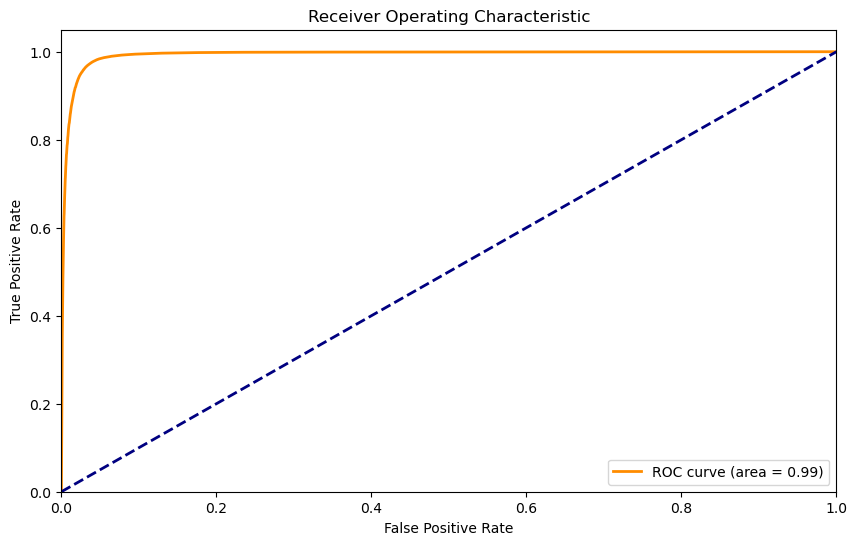

Accuracy: 0.9683140637114254


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


# Separate features and target variable
X = df_pca_with_target.drop('went_on_backorder', axis=1)
y = df_pca_with_target['went_on_backorder']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42,n_jobs=-1)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred = classifier.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [65]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    353006
           1       0.96      0.98      0.97    353806

    accuracy                           0.97    706812
   macro avg       0.97      0.97      0.97    706812
weighted avg       0.97      0.97      0.97    706812



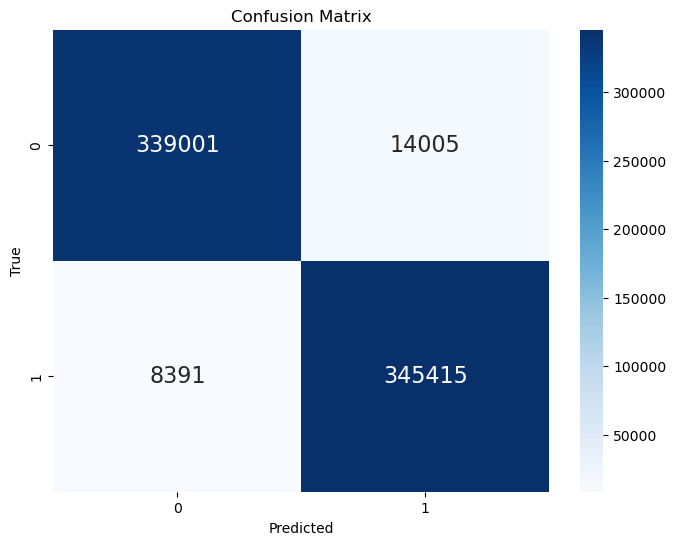

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, confusion_matrix


# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [67]:
#### xgboost 

# Split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
from matplotlib.colors import ListedColormap

def plot_confusion_matrix(model):
    train_y_pred = model.predict(Xtest)

    cm = confusion_matrix(ytest, train_y_pred)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [70]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    train_pred = model.predict(Xtest)
    return(classification_report(ytest, train_pred))

In [71]:
def plot_roc(model):
    plt.figure(figsize=(8,5))
    train_y_pred_prob = model.predict_proba(Xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, train_y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for backorder Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.70, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, train_y_pred_prob),4)))
    
    # plot the grid
    plt.grid(True)

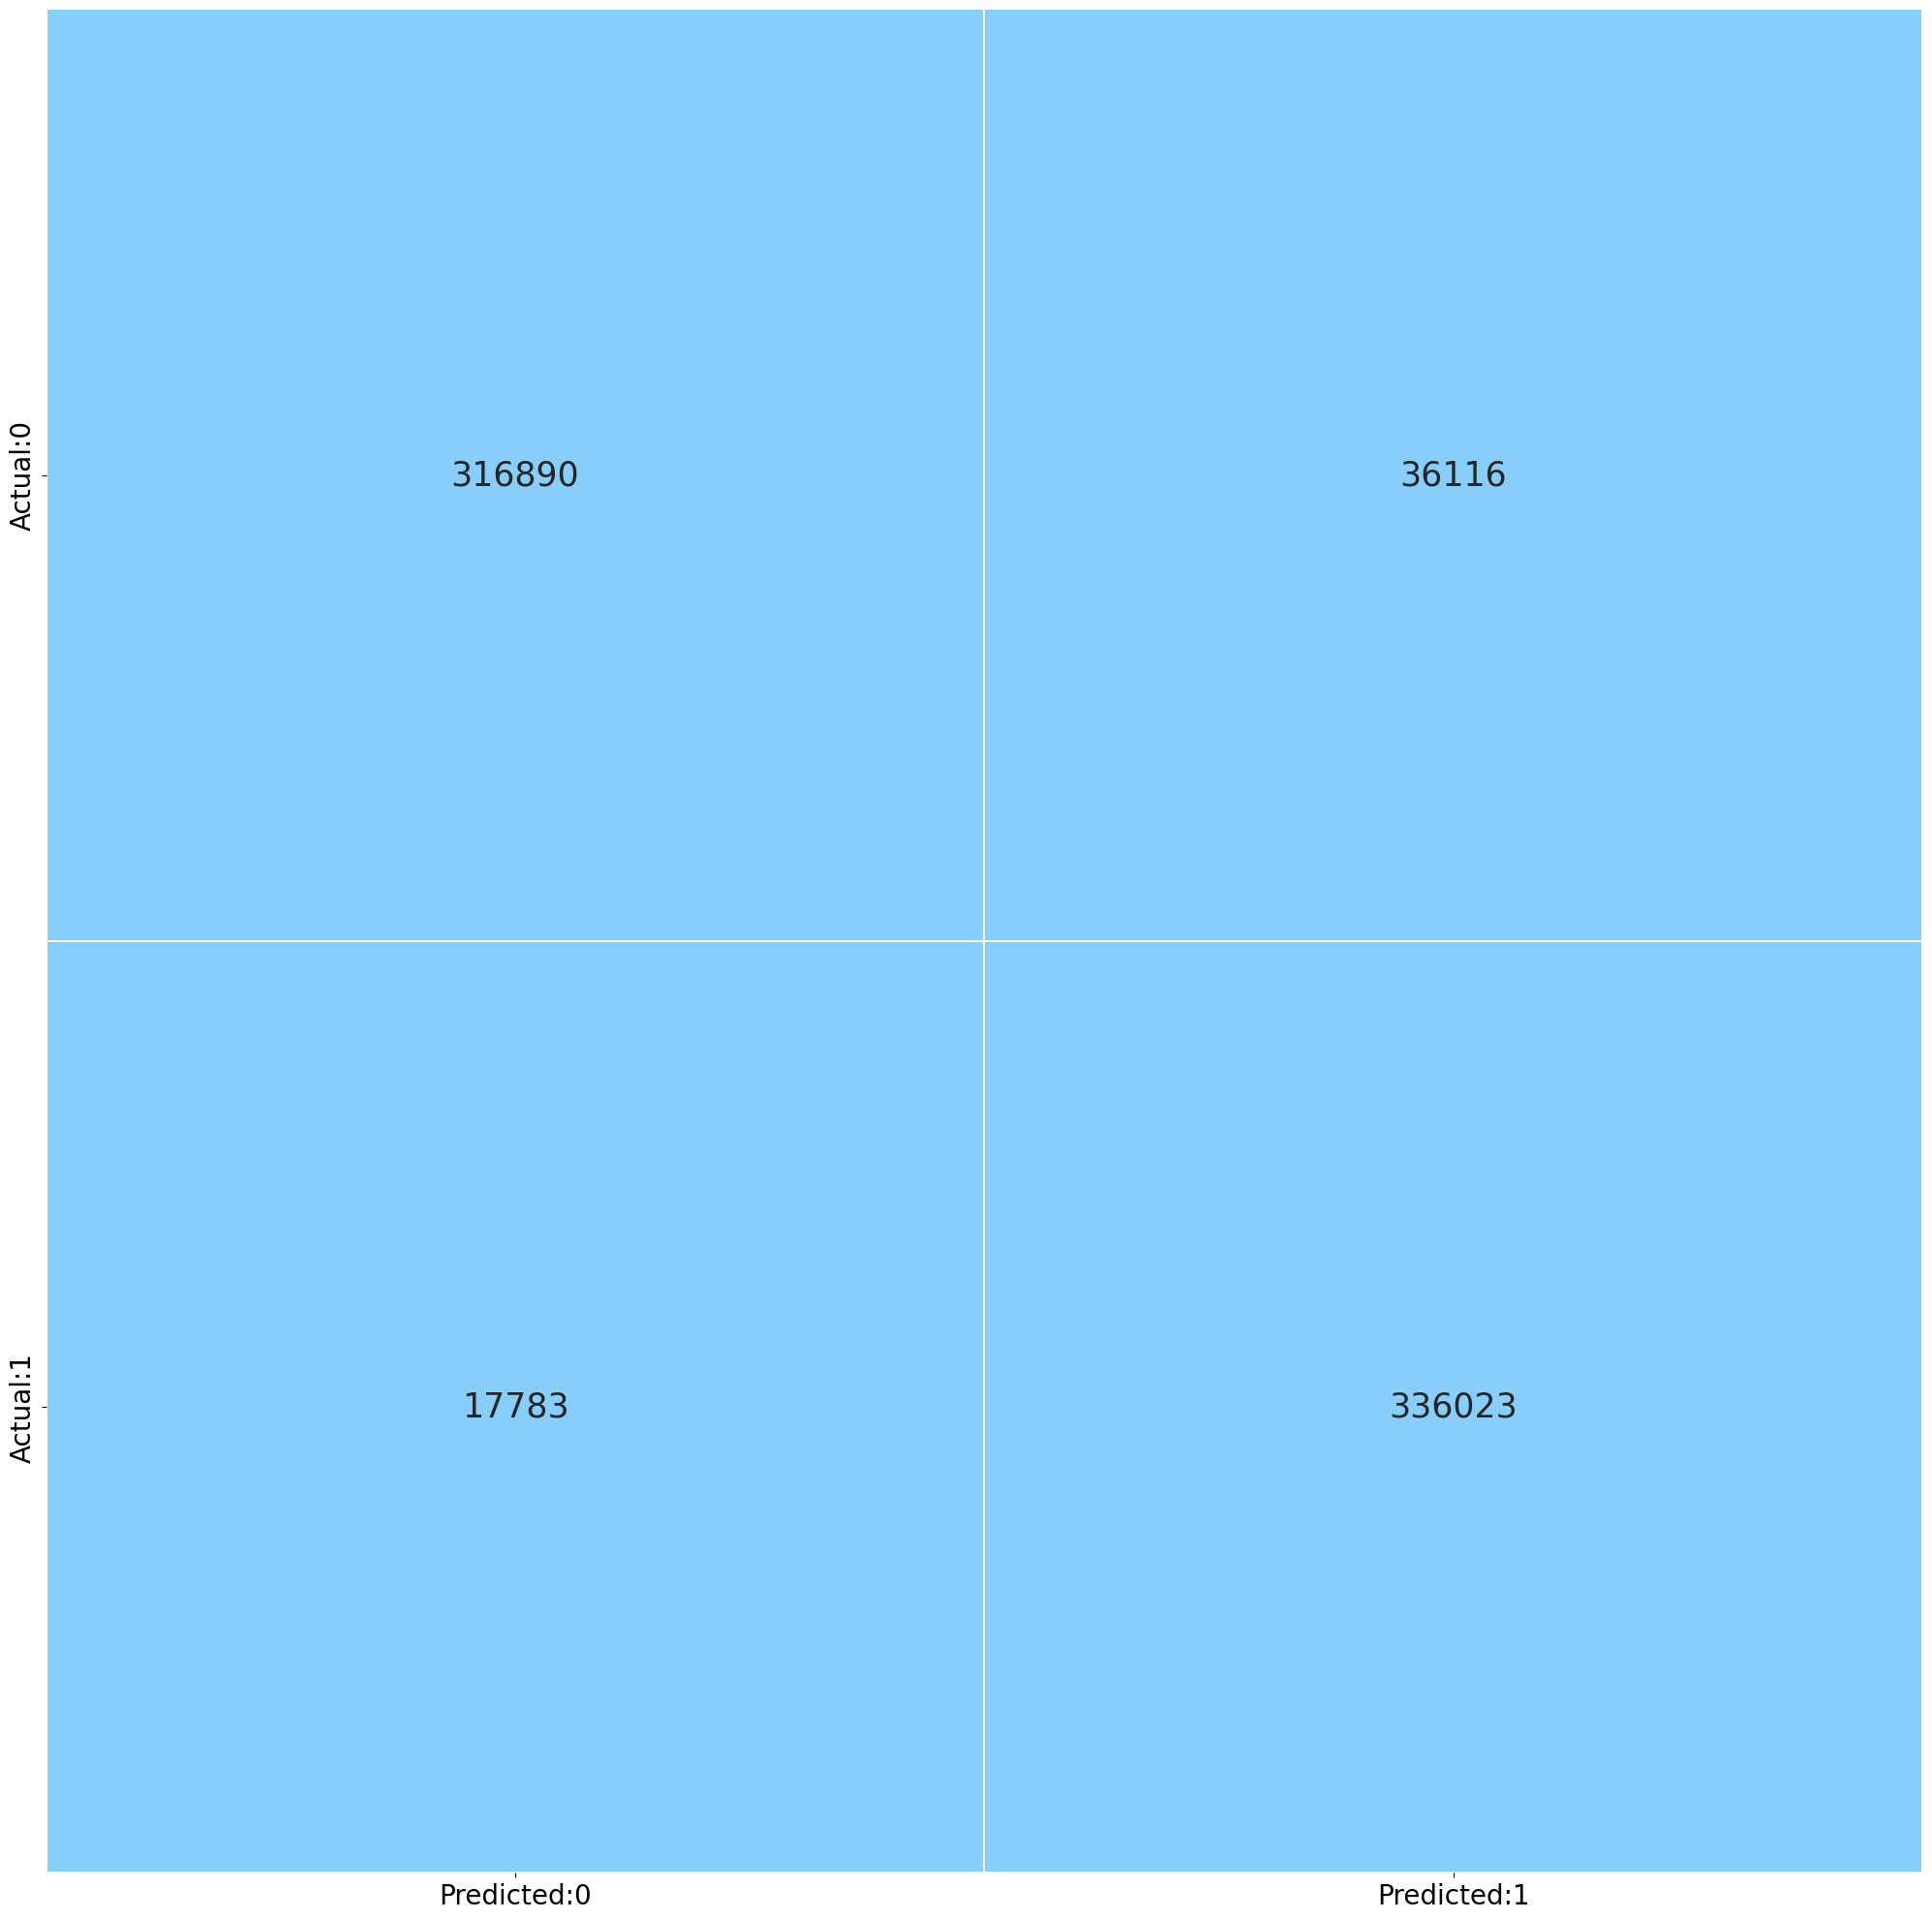

In [72]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

In [73]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92    353006
           1       0.90      0.95      0.93    353806

    accuracy                           0.92    706812
   macro avg       0.92      0.92      0.92    706812
weighted avg       0.92      0.92      0.92    706812



Accuracy: 0.9237435131265457


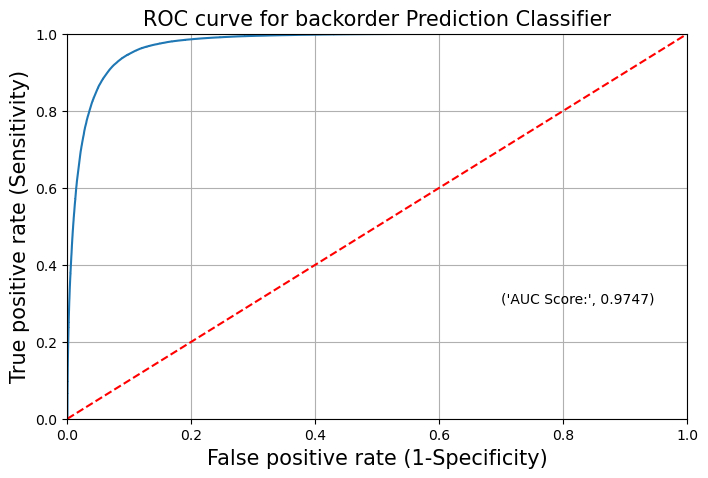

In [74]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

train_ypred = xgb_model.predict(Xtest)
accuracy = accuracy_score(ytest, train_ypred)
print("Accuracy:", accuracy)

In [75]:
### On Test Dataset

In [76]:
df_test=pd.read_csv('Kaggle_Training_Dataset_v2.csv')
df_test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [77]:
print('Shape of the data-set:', df_test.shape)

Shape of the data-set: (1687861, 23)


In [78]:
#Number of duplicated rows:
sum(df_test.duplicated())

0

In [79]:
#Handling missing data - checking the count of missing values:
df_test.isnull().sum()[df_test.isnull().sum()>0]

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [80]:

# Replace NaN by median value
df_test['lead_time'] = df_test['lead_time'].astype('float')
df_test['lead_time'].replace(np.nan, med_lt, inplace=True)


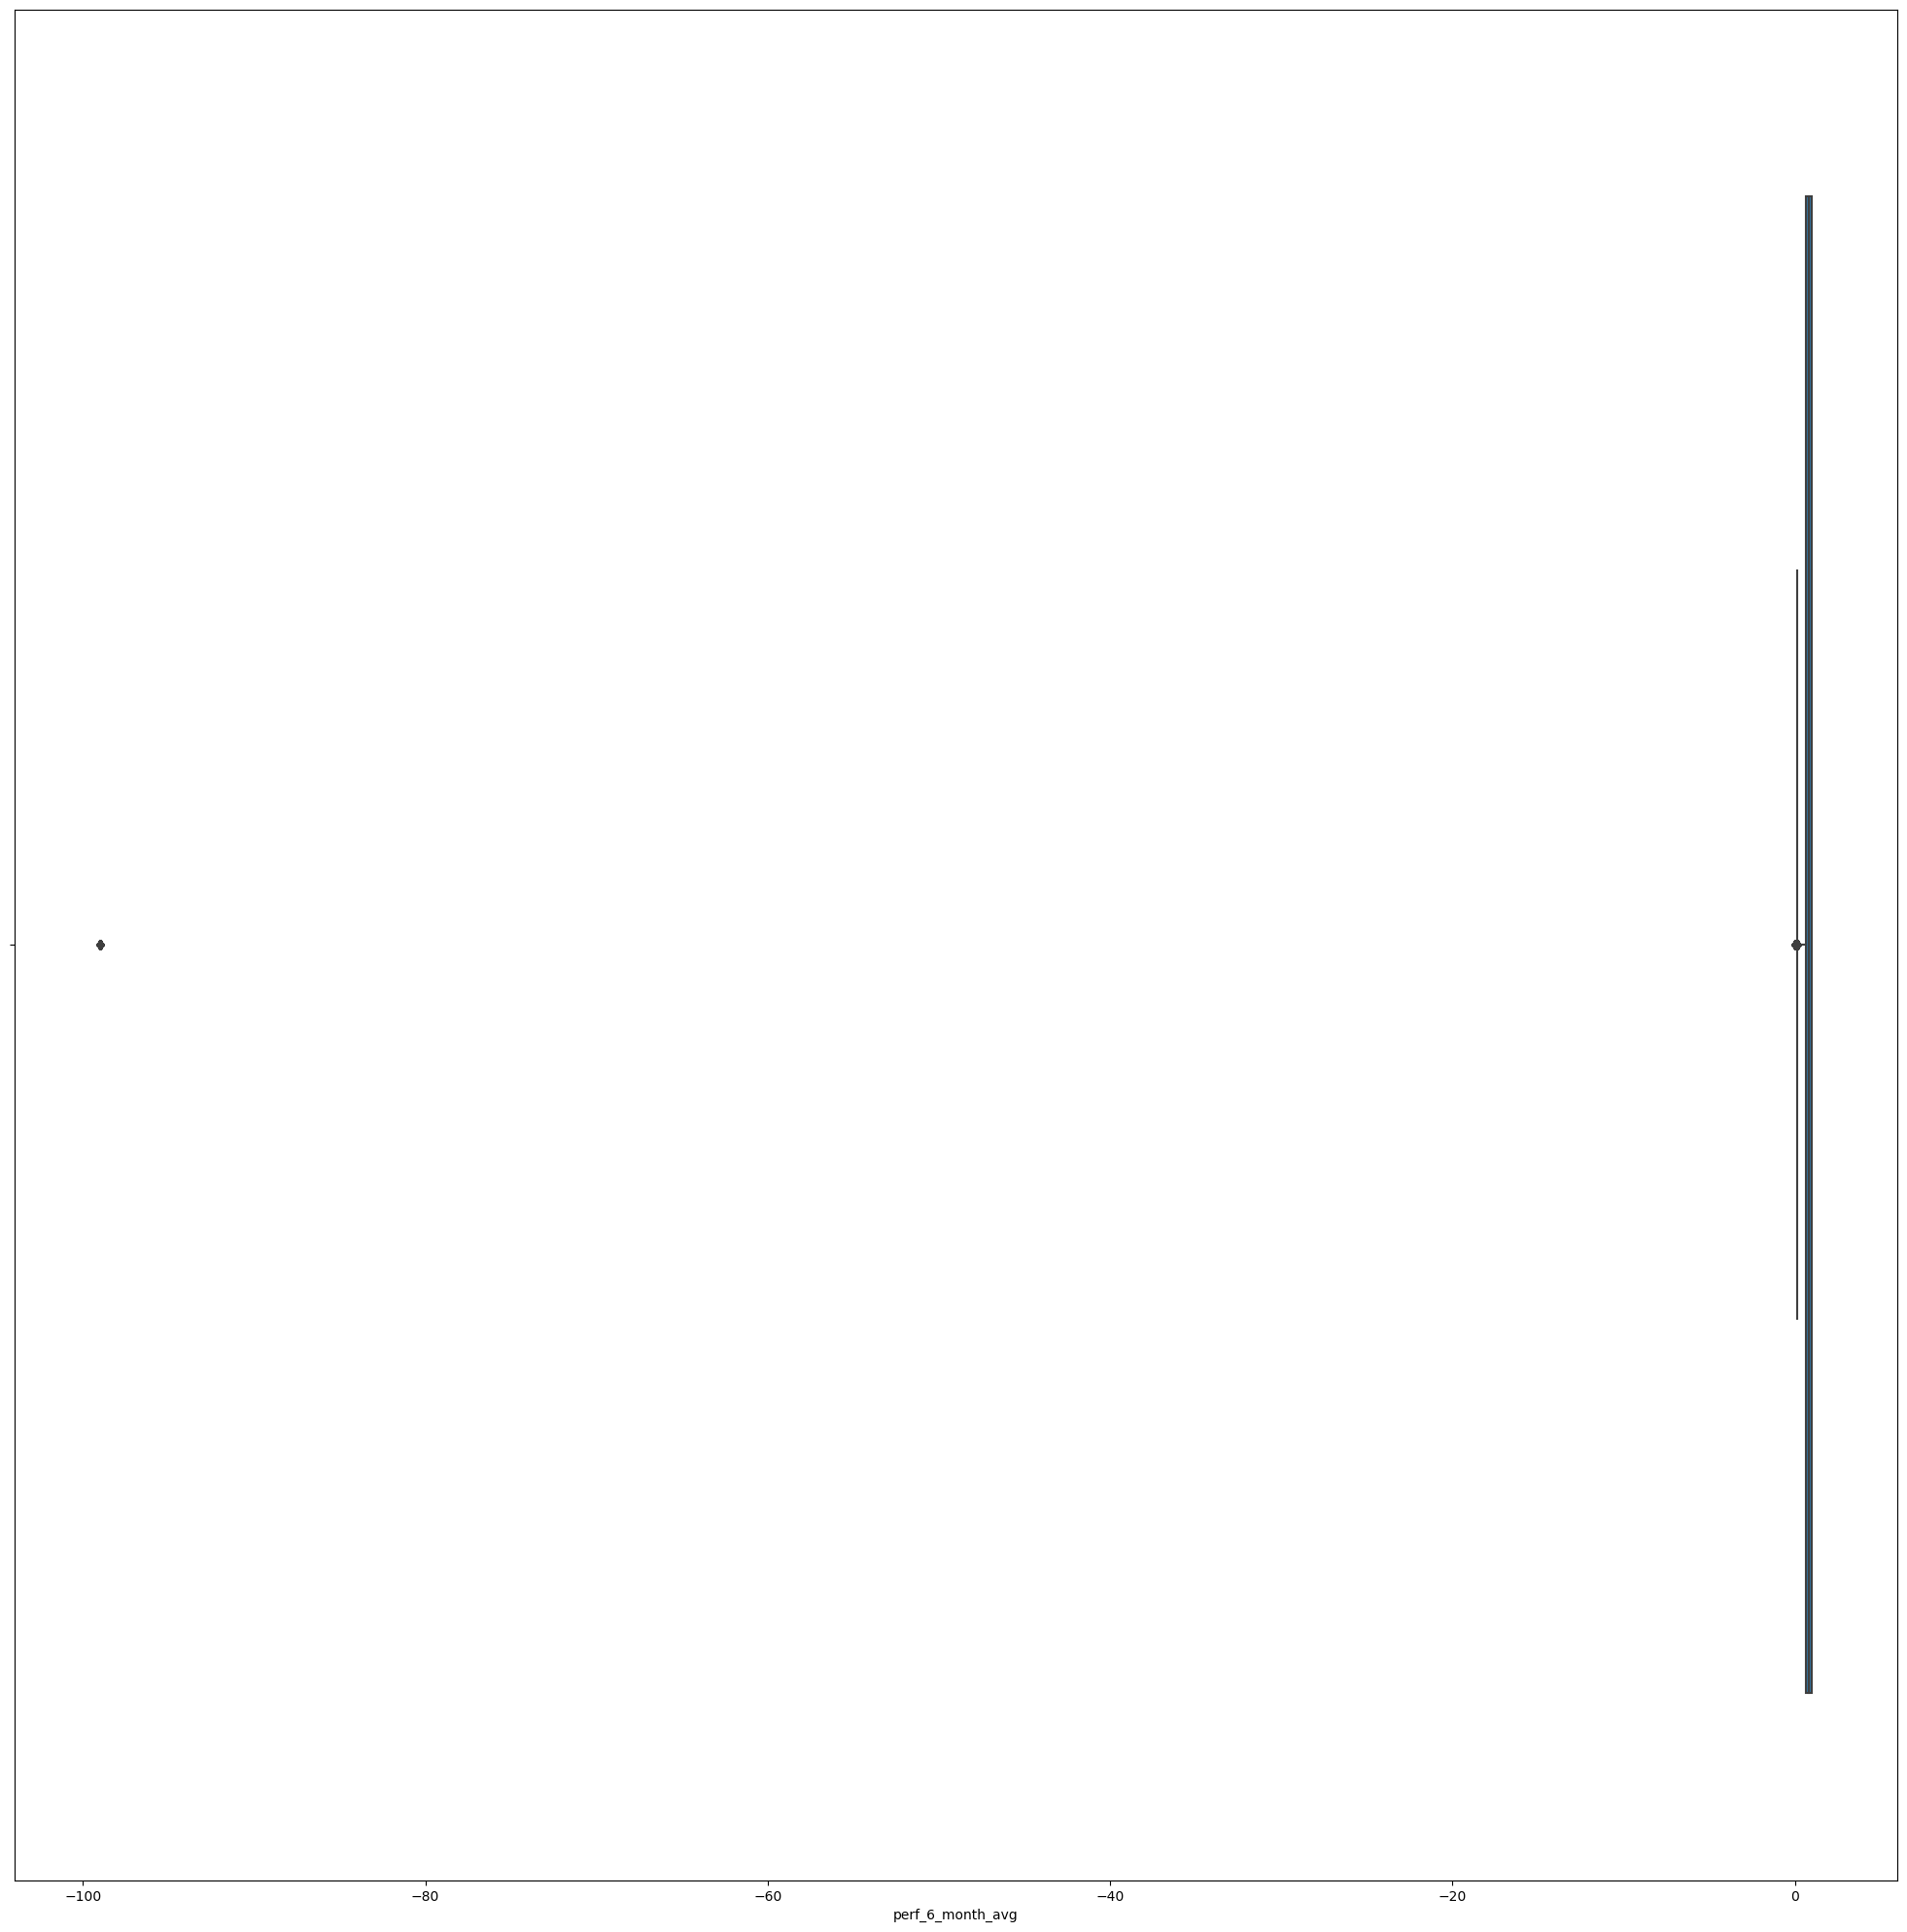

In [81]:
sns.boxplot(df_test.perf_6_month_avg) 
plt.show()

In [82]:
#Replace neg value with 0 perf_6_month_avg

#df['perf_6_month_avg']=df['perf_6_month_avg'].astype('float')
df_test['perf_6_month_avg'].replace(-99, 0, inplace=True)

In [83]:
#Replace neg value with 0 for 'perf_12_month_avg

#df['perf_12_month_avg']=df['perf_12_month_avg'].astype('float')
df_test['perf_12_month_avg'].replace(-99, 0, inplace=True)

In [84]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

national_inv         1
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [85]:
df_test=df_test.dropna()

In [86]:
#Dropping sku column
df_test.drop(['sku','pieces_past_due', 'local_bo_qty','sales_6_month', 'perf_12_month_avg','forecast_6_month', 'sales_3_month', 'sales_9_month', 'forecast_9_month','sales_1_month']
, axis=1,inplace=True)

In [87]:
# Now, apply the same treatment to the test data
# Assuming df_test is your test dataset

for column in numerical_features:
    # Use the stored floor and ceiling values for the test data
    floor_value = floor_values[column]
    ceiling_value = ceiling_values[column]
    
    # Apply outlier treatment for values below the floor value
    df_test[column] = np.where(df_test[column] < floor_value, floor_value, df_test[column])
    # Apply outlier treatment for values above the ceiling value
    df_test[column] = np.where(df_test[column] > ceiling_value, ceiling_value, df_test[column])

# Display a few rows of the updated test DataFrame
print(df_test.head())


   national_inv  lead_time  in_transit_qty  forecast_3_month  min_bank  \
0           0.0        8.0             0.0               0.0       0.0   
1           2.0        9.0             0.0               0.0       0.0   
2           2.0        8.0             0.0               0.0       0.0   
3           7.0        8.0             0.0               0.0       1.0   
4           8.0        8.0             0.0               0.0       2.0   

  potential_issue  perf_6_month_avg deck_risk oe_constraint ppap_risk  \
0              No             0.245        No            No        No   
1              No             0.990        No            No        No   
2              No             0.245       Yes            No        No   
3              No             0.245        No            No        No   
4              No             0.245       Yes            No        No   

  stop_auto_buy rev_stop went_on_backorder  
0           Yes       No                No  
1           Yes       No  

In [88]:
from sklearn.preprocessing import LabelEncoder

col_encode = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']

le = LabelEncoder()

for i in col_encode:
    encoded = le.fit_transform(df_test[i])
    df_test[i] = encoded
df_test.head()


,national_inv,lead_time,in_transit_qty,forecast_3_month,min_bank,potential_issue,perf_6_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0,0.245,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0,0.990,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0,0.245,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,1.0,0,0.245,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,2.0,0,0.245,1,0,0,1,0,0


In [89]:
# Separate categorical and numerical features
categorical_features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
numerical_features = df_test.columns.difference(categorical_features)

# Extract features and target
X_test = df_test[numerical_features]
y_test = df_test['went_on_backorder']

# Fit and transform the numerical features using the StandardScaler
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame for the scaled numerical features
df_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features)

# Merge scaled numerical features back with categorical features and target
df_test_scaled = pd.concat([df_test_scaled, df_test[categorical_features]], axis=1)

# Display a few rows of the scaled DataFrame
print(df_test_scaled.head())


   forecast_3_month  in_transit_qty  lead_time  min_bank  national_inv  \
0         -0.820539       -0.497127   0.413784 -0.584704     -0.514966   
1         -0.820539       -0.497127   0.708295 -0.584704     -0.492659   
2         -0.820539       -0.497127   0.413784 -0.584704     -0.492659   
3         -0.820539       -0.497127   0.413784 -0.513351     -0.436893   
4         -0.820539       -0.497127   0.413784 -0.441999     -0.425740   

   perf_6_month_avg  potential_issue  deck_risk  oe_constraint  ppap_risk  \
0         -2.016200                0          0              0          0   
1          1.029184                0          0              0          0   
2         -2.016200                0          1              0          0   
3         -2.016200                0          0              0          0   
4         -2.016200                0          1              0          0   

   stop_auto_buy  rev_stop  went_on_backorder  
0              1         0                  

In [90]:
# Extract the features and target from the scaled DataFrame
X_scaled = df_test_scaled.drop('went_on_backorder', axis=1)
y_scaled = df_test_scaled['went_on_backorder']

# Fit and transform the scaled features using PCA
X_pca = pca.transform(X_scaled)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PCA_{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Merge PCA-transformed features with the target column
df_pca_with_target = pd.concat([df_pca, y_scaled], axis=1)

# Display a few rows of the PCA-transformed DataFrame
print(df_pca_with_target.head())


      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5  went_on_backorder
0 -1.259179  1.075707  1.527996  0.606467  0.432134                  0
1 -1.073601 -1.313453 -0.006992 -0.409740  0.084310                  0
2 -1.293509  1.136031  1.521638  0.711053  0.434519                  0
3 -1.184856  1.061095  1.533983  0.660399  0.391640                  0
4 -1.182096  1.130061  1.530912  0.756170  0.387161                  0


ROC AUC Score: 0.9689317909573968


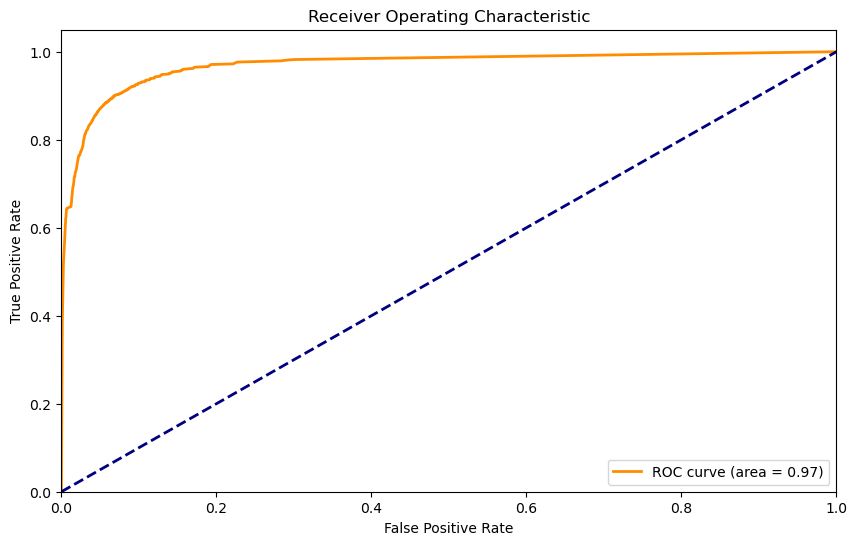

Accuracy: 0.9652192717405472


In [91]:
# Separate features and target variable
X_test = df_pca_with_target.drop('went_on_backorder', axis=1)
y_test = df_pca_with_target['went_on_backorder']

# Predict on the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred = classifier.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [92]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   1676567
           1       0.14      0.82      0.24     11293

    accuracy                           0.97   1687860
   macro avg       0.57      0.90      0.61   1687860
weighted avg       0.99      0.97      0.98   1687860



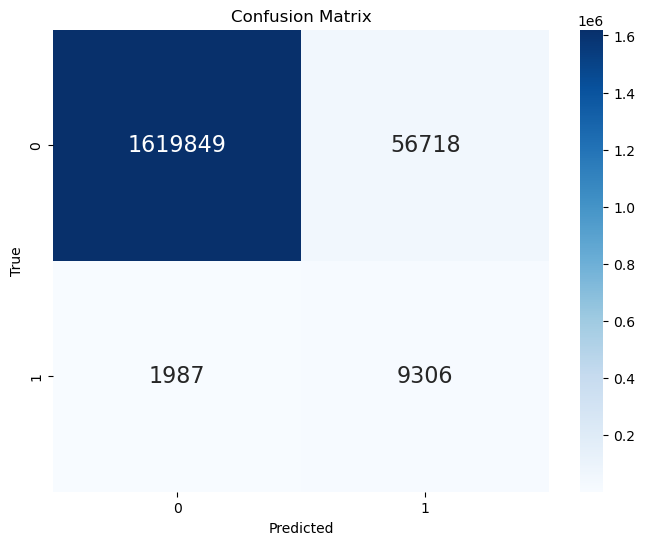

In [93]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [94]:
#### xgboost 

In [95]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(Xtest, ytest)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
from matplotlib.colors import ListedColormap

def plot_confusion_matrix(model):
    test_ypred = model.predict(Xtest)

    cm = confusion_matrix(ytest, test_ypred)


    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [97]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    test_test_pred = model.predict(Xtest)
    
    return(classification_report(ytest, test_test_pred))

In [98]:
def plot_roc(model):
    plt.figure(figsize=(8,5))
    test_ypred_prob = model.predict_proba(Xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, test_ypred_prob)
    
    test_pred = model.predict(Xtest)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for backorder Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.70, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, test_ypred_prob),4)))

    # plot the grid
    plt.grid(True)

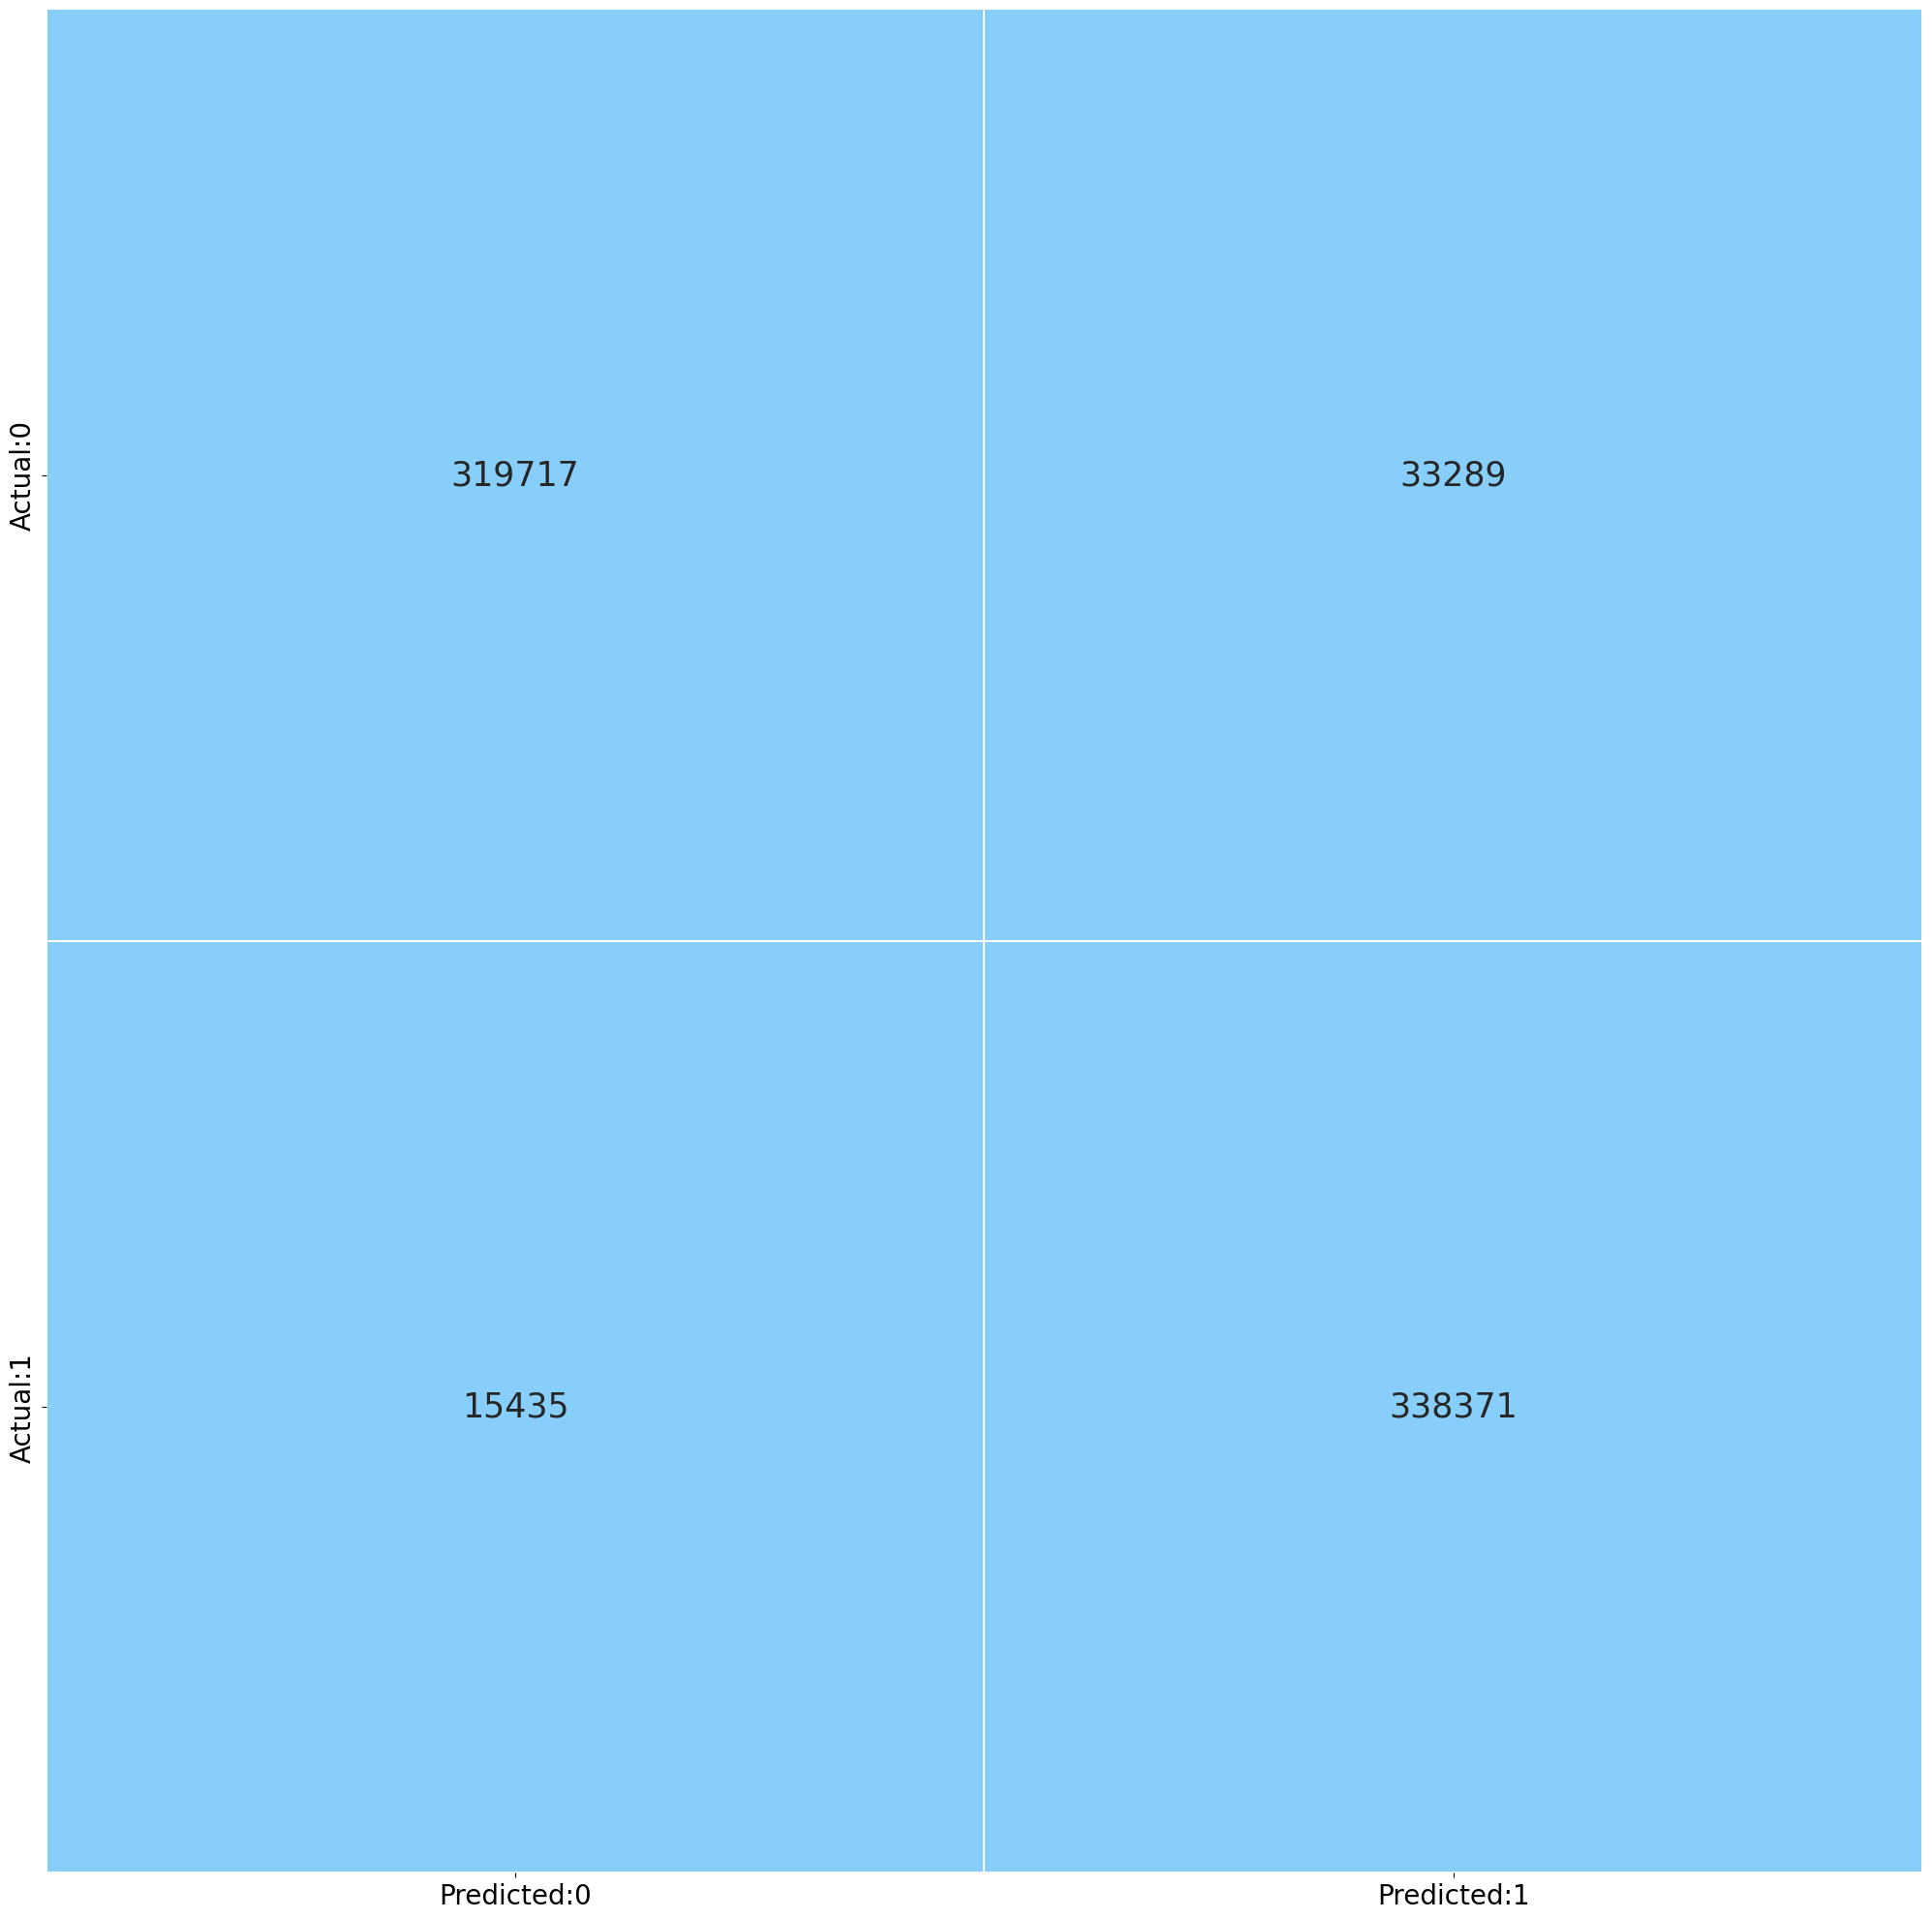

In [99]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

In [100]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93    353006
           1       0.91      0.96      0.93    353806

    accuracy                           0.93    706812
   macro avg       0.93      0.93      0.93    706812
weighted avg       0.93      0.93      0.93    706812



Accuracy: 0.9310651205695433


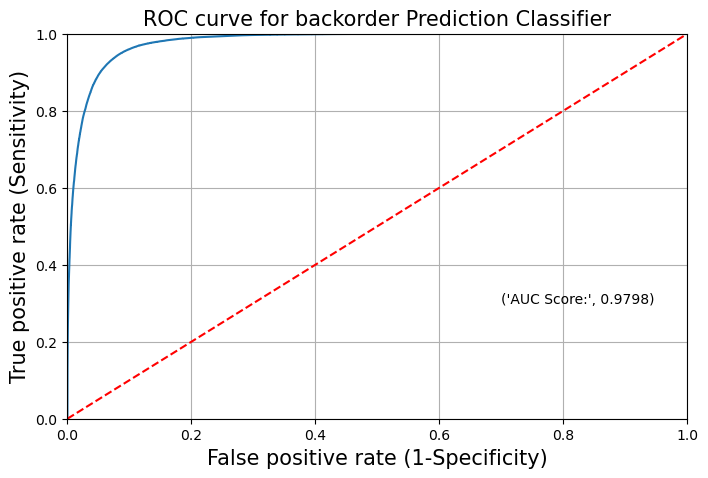